<a href="https://colab.research.google.com/github/tanuTriveni/Bitcoin/blob/main/Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

In [ ]:
# data= pd.read_csv('/content/EVANS-EFCO_clean_with_weather_and_2018.csv')

In [ ]:
# data.head()


In [ ]:
# data.describe()

In [ ]:
# data.dtypes

In [ ]:
# data.isnull().sum()

In [ ]:
# data = data.dropna()

In [ ]:
# # Change the format to match the date strings
# data['DATE(HOURS/DAY/MONTH/YEAR)'] = pd.to_datetime(data['DATE(HOURS/DAY/MONTH/YEAR)'], format='%d-%m-%Y %H:%M')

In [ ]:
# data['DATE(HOURS/DAY/MONTH/YEAR)'] = pd.to_datetime(data['DATE(HOURS/DAY/MONTH/YEAR)'], format='%d-%m-%y %H:%M')

# # Extract Month, Year, Day, and Hour


# data['Year'] = data['DATE(HOURS/DAY/MONTH/YEAR)'].dt.year
# data['Month'] = data['DATE(HOURS/DAY/MONTH/YEAR)'].dt.month
# data['Day'] = data['DATE(HOURS/DAY/MONTH/YEAR)'].dt.day
# data['Hour'] = data['DATE(HOURS/DAY/MONTH/YEAR)'].dt.hour

In [ ]:
# data.set_index('DATE(HOURS/DAY/MONTH/YEAR)', inplace=True)


In [ ]:
# plt.figure(figsize=(10, 6))
# sns.histplot(data['ENERGY CONSUMPTION'], bins=30, kde=True)
# plt.title('Distribution of Energy Consumption')
# plt.xlabel('Energy Consumption (kWh)')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# print(data.columns)

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=data, x='WIND DIRECTION(DEGREE)', y='ENERGY CONSUMPTION')
# plt.title('Wind Direction vs. Energy Consumption')
# plt.xlabel('Wind Direction (degrees)')
# plt.ylabel('Energy Consumption (kWh)')
# plt.show()

In [102]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tensorflow as tf



In [103]:
energy = pd.read_csv('/content/energy_dataset.csv')
energy.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [104]:
energy.describe().T
energy.rename(columns={
   'total load actual':'Energy Consumption'

}, inplace=True)


In [105]:

colnames = ['generation fossil coal-derived gas', 'generation fossil oil shale','generation fossil peat',
           'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine',
           'generation wind offshore', 'forecast wind offshore eday ahead', 'forecast solar day ahead',
            'forecast wind onshore day ahead','price actual','total load forecast','price day ahead']
energy = energy.drop(colnames, axis = 1)

# def check_Nans_Dups(df_input):

#     print('Number of Nans in each column :')

#     print(df_input.isnull().sum())
#     print()/
1#     print(f'Number of duplicates in the dataframe : {df_input.duplicated().sum()}')
#     return
# check_Nans_Dups(df_energy)




1

In [106]:
energy.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   
2                                       1164.0   
3                                       1503.0   
4                                       1826.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   
2                                       973.0   
3                                       949.0   
4                                       953.0   

   generation hydro water reservoir  generation nuclear  generation other  \
0                            1899.0              7096.0              43.0   
1                            1658.0              7096.0              43.0   
2                            1371.0              7099.0              43.0   
3                             779.0              7098.0              43.0   
4                             720.0              7097.0              43.0   

   generation other renewable  generation solar  generation waste  \
0                        73.0              49.0             196.0   
1                        71.0              50.0             195.0   
2                        73.0              50.0             196.0   
3                        75.0              50.0             191.0   
4                        74.0              42.0             189.0   

   generation wind onshore  Energy Consumption  
0                   6378.0             25385.0  
1                   5890.0             24382.0  
2                   5461.0             22734.0  
3                   5238.0             21286.0  
4                   4935.0             20264.0

In [107]:
energy.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
Energy Consumption                             36
dtype: int64

In [108]:
energy['time'] = pd.to_datetime(energy['time'])
energy = energy.set_index('time')
energy


generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   
...                                       ...   
2018-12-31 19:00:00+01:00               297.0   
2018-12-31 20:00:00+01:00               296.0   
2018-12-31 21:00:00+01:00               292.0   
2018-12-31 22:00:00+01:00               293.0   
2018-12-31 23:00:00+01:00               290.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   
...                                                         ...   
2018-12-31 19:00:00+01:00                                   0.0   
2018-12-31 20:00:00+01:00                                   0.0   
2018-12-31 21:00:00+01:00                                   0.0   
2018-12-31 22:00:00+01:00                                   0.0   
2018-12-31 23:00:00+01:00                                   0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   
...                                          ...                          ...   
2018-12-31 19:00:00+01:00                 7634.0                       2628.0   
2018-12-31 20:00:00+01:00                 7241.0                       2566.0   
2018-12-31 21:00:00+01:00                 7025.0                       2422.0   
2018-12-31 22:00:00+01:00                 6562.0                       2293.0   
2018-12-31 23:00:00+01:00                 6926.0                       2166.0   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   
...                                          ...   
2018-12-31 19:00:00+01:00                  178.0   
2018-12-31 20:00:00+01:00                  174.0   
2018-12-31 21:00:00+01:00                  168.0   
2018-12-31 22:00:00+01:00                  163.0   
2018-12-31 23:00:00+01:00                  163.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   
...                                                                ...   
2018-12-31 19:00:00+01:00                                          1.0   
2018-12-31 20:00:00+01:00                                          1.0   
2018-12-31 21:00:00+01:00                     

In [109]:
energy[energy.isna().any(axis = 1)]

generation biomass  \
time                                            
2015-01-05 03:00:00+01:00                 NaN   
2015-01-05 12:00:00+01:00                 NaN   
2015-01-05 13:00:00+01:00                 NaN   
2015-01-05 14:00:00+01:00                 NaN   
2015-01-05 15:00:00+01:00                 NaN   
2015-01-05 16:00:00+01:00                 NaN   
2015-01-05 17:00:00+01:00                 NaN   
2015-01-19 19:00:00+01:00                 NaN   
2015-01-19 20:00:00+01:00                 NaN   
2015-01-27 19:00:00+01:00                 NaN   
2015-01-28 13:00:00+01:00                 NaN   
2015-02-01 07:00:00+01:00               449.0   
2015-02-01 08:00:00+01:00               453.0   
2015-02-01 09:00:00+01:00               452.0   
2015-02-01 12:00:00+01:00               405.0   
2015-02-01 13:00:00+01:00               402.0   
2015-02-01 14:00:00+01:00               400.0   
2015-02-01 15:00:00+01:00               393.0   
2015-02-01 16:00:00+01:00               413.0   
2015-02-01 17:00:00+01:00               465.0   
2015-02-01 18:00:00+01:00               482.0   
2015-02-01 19:00:00+01:00               474.0   
2015-04-05 03:00:00+02:00               371.0   
2015-04-16 09:00:00+02:00                 NaN   
2015-04-20 08:00:00+02:00               424.0   
2015-04-23 21:00:00+02:00                 NaN   
2015-05-02 10:00:00+02:00               497.0   
2015-05-29 03:00:00+02:00               569.0   
2015-06-15 09:00:00+02:00                 NaN   
2015-10-02 08:00:00+02:00               483.0   
2015-10-02 11:00:00+02:00                 NaN   
2015-12-02 09:00:00+01:00                 NaN   
2016-04-13 05:00:00+02:00               220.0   
2016-04-25 05:00:00+02:00               190.0   
2016-04-25 07:00:00+02:00               206.0   
2016-05-10 23:00:00+02:00               348.0   
2016-06-12 01:00:00+02:00               356.0   
2016-07-09 22:00:00+02:00                 NaN   
2016-07-12 00:00:00+02:00               346.0   
2016-09-28 09:00:00+02:00               347.0   
2016-10-27 23:00:00+02:00               351.0   
2016-11-23 04:00:00+01:00                 NaN   
2017-11-14 12:00:00+01:00                 0.0   
2017-11-14 19:00:00+01:00                 0.0   
2018-06-11 18:00:00+02:00               331.0   
2018-07-11 09:00:00+02:00                 NaN   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-05 03:00:00+01:00                                   NaN   
2015-01-05 12:00:00+01:00                                   NaN   
2015-01-05 13:00:00+01:00                                   NaN   
2015-01-05 14:00:00+01:00                                   NaN   
2015-01-05 15:00:00+01:00                                   NaN   
2015-01-05 16:00:00+01:00                                   NaN   
2015-01-05 17:00:00+01:00                                   NaN   
2015-01-19 19:00:00+01:00                                   NaN   
2015-01-19 20:00:00+01:00                                   NaN   
2015-01-27 19:00:00+01:00                                   NaN   
2015-01-28 13:00:00+01:00                                   NaN   
2015-02-01 07:00:00+01:00                                 312.0   
2015-02-01 08:00:00+01:00                                 312.0   
2015-02-01 09:00:00+01:00                                 302.0   
2015-02-01 12:00:00+01:00                                 317.0   
2015-02-01 13:00:00+01:00                                 317.0   
2015-02-01 14:00:00+01:00                                 317.0   
2015-02-01 15:00:00+01:00                                 321.0   
2015-02-01 16:00:00+01:00                                 325.0   
2015-02-01 17:00:00+01:00                                 321.0   
2015-02-01 18:00:00+01:00                                 326.0   
2015-02-01 19:00:00+01:00                                 326.0   
2015-04-05 03:00:00+02:00                                   0.0   

In [110]:
energy.interpolate(method='linear', limit_direction='forward', inplace = True)

In [111]:
energy.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
Energy Consumption                             0
dtype: int64

Text(0, 0.5, 'Energy Consumption')

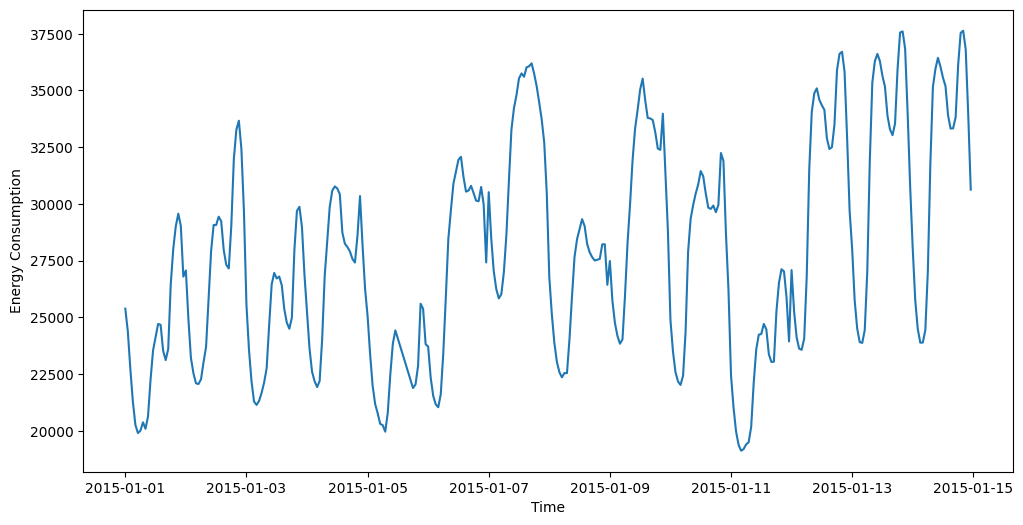

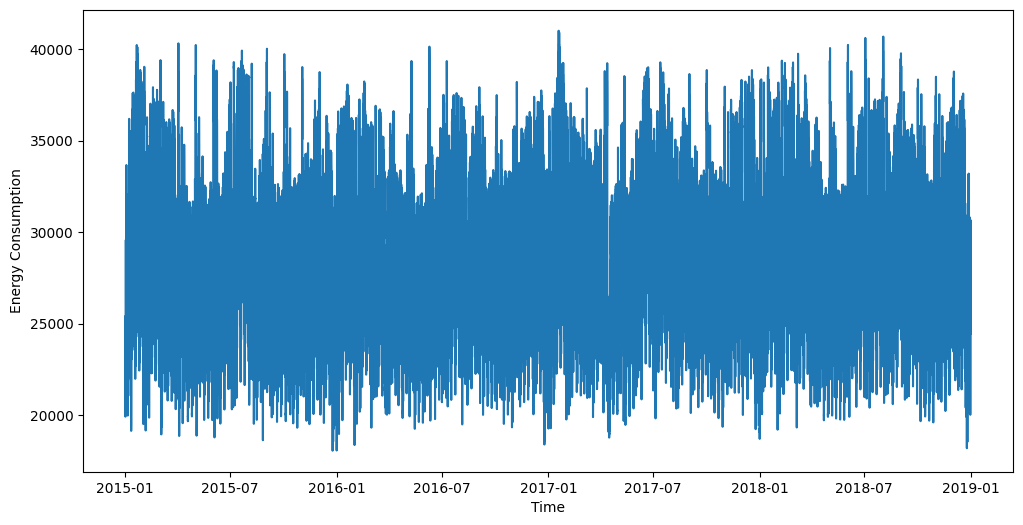

In [112]:
plt.figure(figsize=(12,6))

plt.plot(energy['Energy Consumption'][:24*7*2])
plt.xlabel('Time')
plt.ylabel('Energy Consumption')

plt.figure(figsize=(12,6))

plt.plot(energy['Energy Consumption'][:])
plt.xlabel('Time')
plt.ylabel('Energy Consumption')

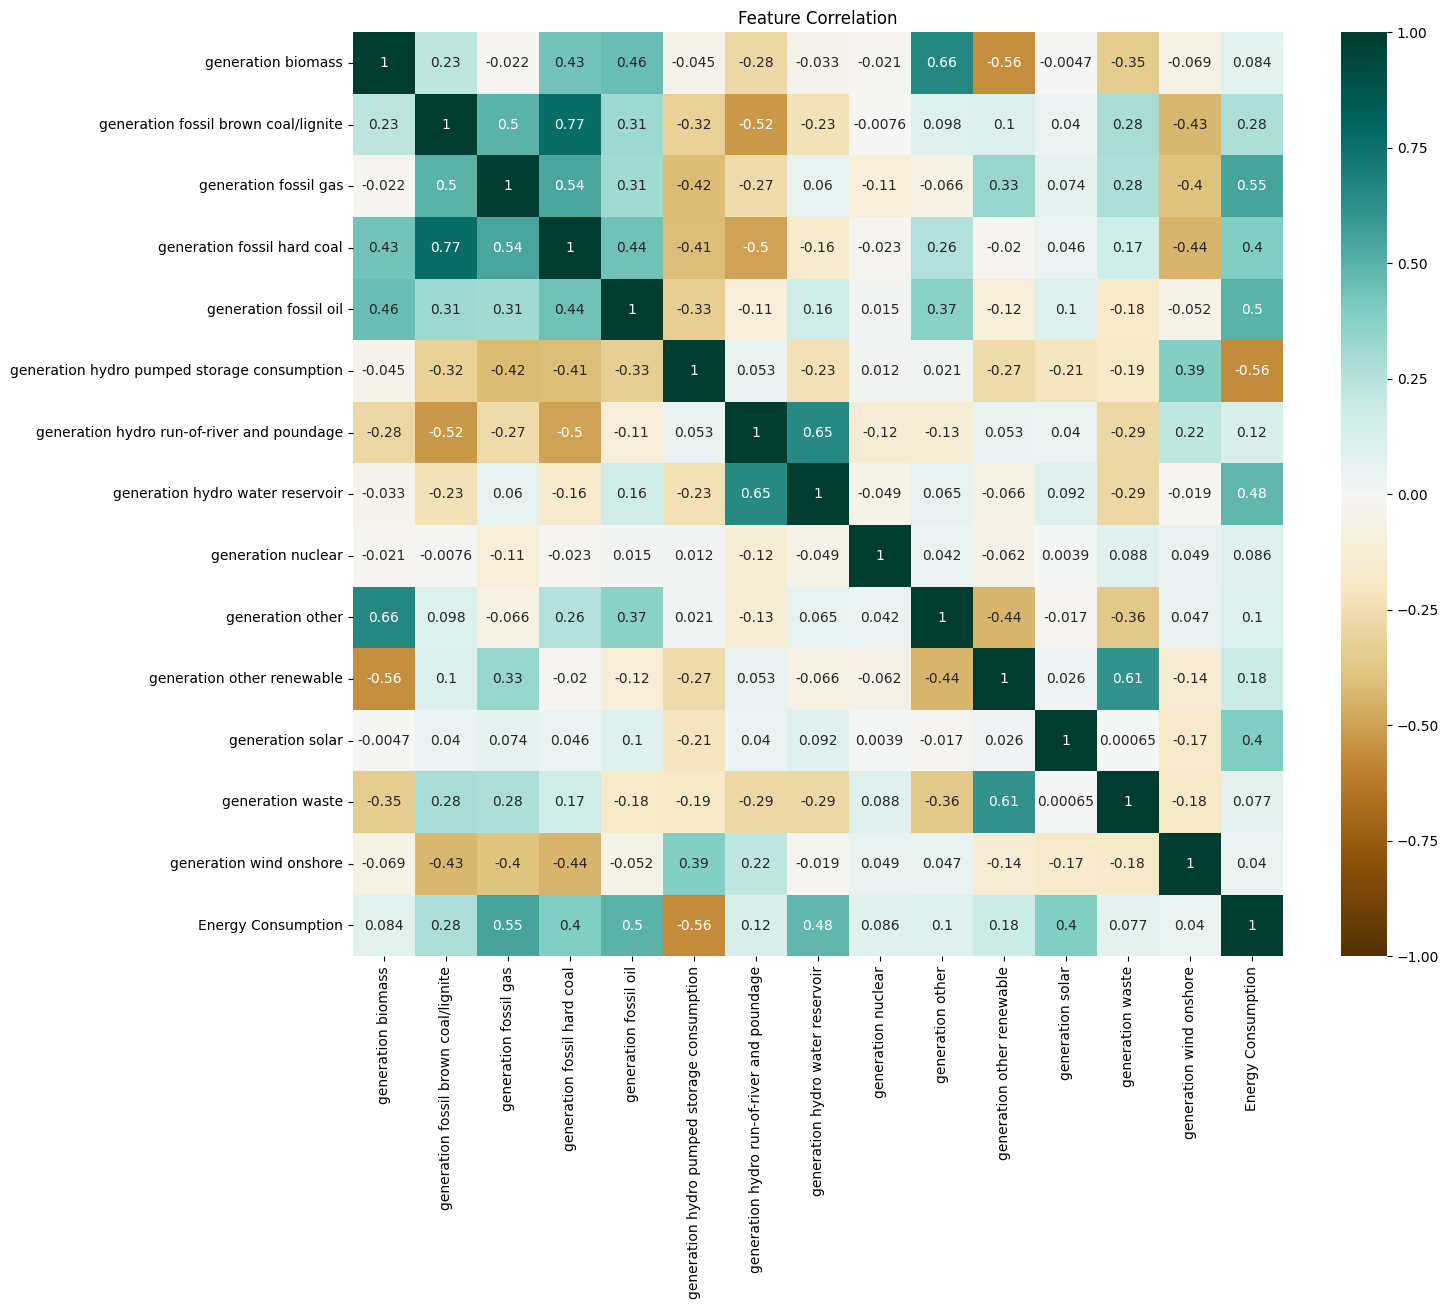

In [113]:

def feat_corr(input_df):
    corr = input_df.corr()
    plt.figure(figsize=(15,12))

    g=sns.heatmap(corr,annot=True,cmap="BrBG", vmin=-1, vmax=1)
    plt.title('Feature Correlation')


    return plt.show()
feat_corr(energy)


In [114]:
energy["generation fossil total"] = energy['generation fossil hard coal'] + energy['generation fossil brown coal/lignite']
energy.drop(['generation fossil hard coal', 'generation fossil brown coal/lignite'], axis = 1, inplace = True)


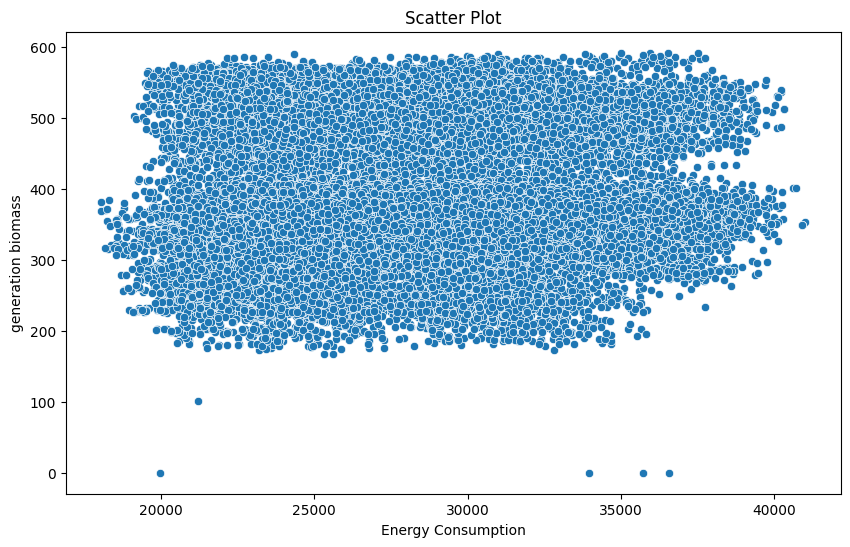

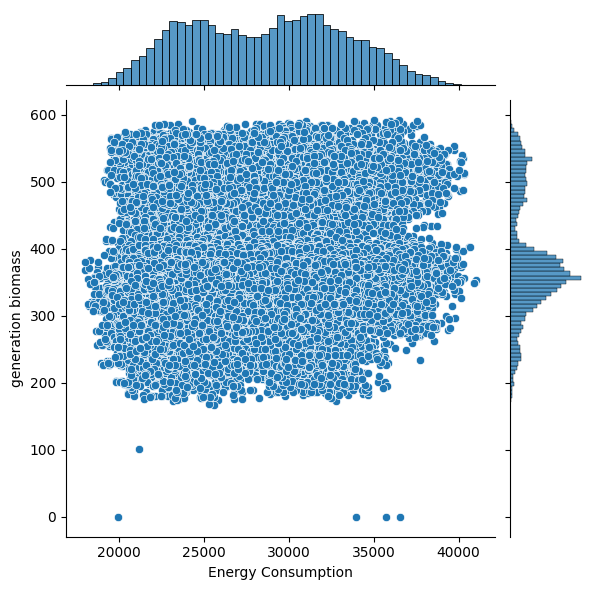

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy Consumption', y='generation biomass' , data=energy)

# Add labels and title
plt.xlabel('Energy Consumption')
plt.ylabel('generation biomass')
plt.title('Scatter Plot')

# Show the plot
plt.show()

sns.jointplot(x='Energy Consumption', y='generation biomass', data=energy)
plt.show()

In [116]:
energy.columns

Index(['generation biomass', 'generation fossil gas', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'Energy Consumption',
       'generation fossil total'],
      dtype='object')

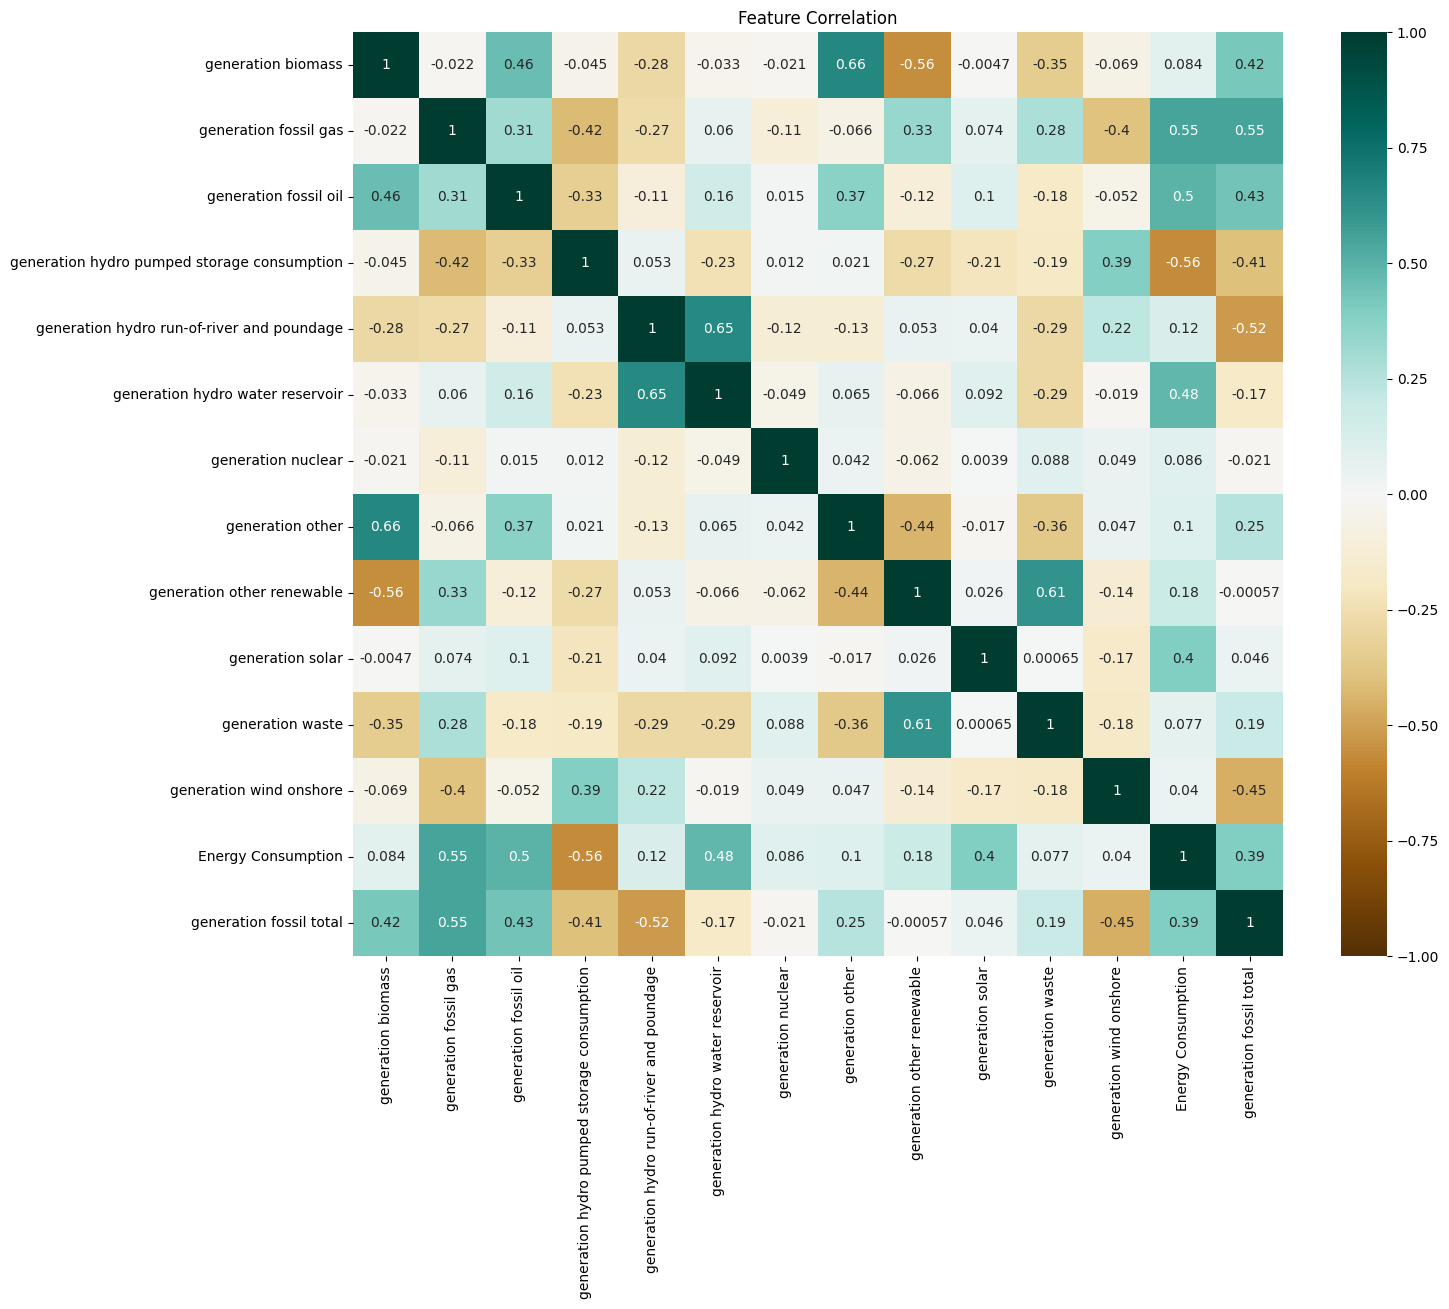

In [117]:
feat_corr(energy)

In [17]:

df_weather = pd.read_csv('/content/weather_features.csv')

In [18]:
df_weather.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475    1001.0   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475    1001.0   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686    1002.0   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686    1002.0   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686    1002.0   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0      77.0         1.0      62.0      0.0      0.0      0.0         0.0   
1      77.0         1.0      62.0      0.0      0.0      0.0         0.0   
2      78.0         0.0      23.0      0.0      0.0      0.0         0.0   
3      78.0         0.0      23.0      0.0      0.0      0.0         0.0   
4      78.0         0.0      23.0      0.0      0.0      0.0         0.0   

   weather_id weather_main weather_description weather_icon  
0       800.0        clear        sky is clear          01n  
1       800.0        clear        sky is clear          01n  
2       800.0        clear        sky is clear          01n  
3       800.0        clear        sky is clear          01n  
4       800.0        clear        sky is clear          01n

In [19]:
from sklearn.preprocessing import LabelEncoder
df_temp = df_weather.copy(deep = True)
labels = ['weather_id', 'weather_main','weather_description','weather_icon']
for col in labels:
    df_temp[col] = LabelEncoder().fit_transform(df_weather[col])


In [20]:
df_weather.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475    1001.0   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475    1001.0   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686    1002.0   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686    1002.0   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686    1002.0   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0      77.0         1.0      62.0      0.0      0.0      0.0         0.0   
1      77.0         1.0      62.0      0.0      0.0      0.0         0.0   
2      78.0         0.0      23.0      0.0      0.0      0.0         0.0   
3      78.0         0.0      23.0      0.0      0.0      0.0         0.0   
4      78.0         0.0      23.0      0.0      0.0      0.0         0.0   

   weather_id weather_main weather_description weather_icon  
0       800.0        clear        sky is clear          01n  
1       800.0        clear        sky is clear          01n  
2       800.0        clear        sky is clear          01n  
3       800.0        clear        sky is clear          01n  
4       800.0        clear        sky is clear          01n

In [21]:
df_weather['time'] = pd.to_datetime(df_weather['dt_iso'])
df_weather.drop(["dt_iso"] , axis = 1, inplace = True)
df_weather = df_weather.set_index('time')


In [22]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_weather['city_name'] = le.fit_transform(df_weather['city_name'])

In [23]:
df_weather['weather_id'].unique()

array([800., 801., 802., 803., 804., 500., 501., 502., 701., 522., 521.,
       503., 202., 200., 201., 211., 520., 300., 741., 301., 711., 302.,
       721., 310., 600., 616., 615., 601., 210., 602., 611., 311.,  nan])

In [24]:
df_weather['weather_id'].unique()

array([800., 801., 802., 803., 804., 500., 501., 502., 701., 522., 521.,
       503., 202., 200., 201., 211., 520., 300., 741., 301., 711., 302.,
       721., 310., 600., 616., 615., 601., 210., 602., 611., 311.,  nan])

In [25]:
col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon', 'temp_min', 'temp_max']

df_weather.drop(col_drop_name, axis = 1 , inplace = True)

In [26]:
def check_Nans_Dups(df_input):

    print('Number of Nans in each column :')

    print(df_input.isnull().sum())
    print()
    print(f'Number of duplicates in the dataframe : {df_input.duplicated().sum()}')
    return
check_Nans_Dups(df_weather)

Number of Nans in each column :
city_name     0
temp          0
pressure      1
humidity      1
wind_speed    1
wind_deg      1
rain_1h       1
rain_3h       1
snow_3h       1
clouds_all    1
dtype: int64

Number of duplicates in the dataframe : 5248


In [27]:
df_weather = df_weather.reset_index().drop_duplicates()

In [28]:
df_weather

time  city_name     temp  pressure  humidity  \
0      2015-01-01 00:00:00+01:00          1  270.475    1001.0      77.0   
1      2015-01-01 01:00:00+01:00          1  270.475    1001.0      77.0   
2      2015-01-01 02:00:00+01:00          1  269.686    1002.0      78.0   
3      2015-01-01 03:00:00+01:00          1  269.686    1002.0      78.0   
4      2015-01-01 04:00:00+01:00          1  269.686    1002.0      78.0   
...                          ...        ...      ...       ...       ...   
65984  2018-05-31 06:00:00+02:00          0  287.720    1017.0      93.0   
65985  2018-05-31 07:00:00+02:00          0  287.150    1017.0      93.0   
65986  2018-05-31 08:00:00+02:00          0  286.180    1018.0      93.0   
65987  2018-05-31 09:00:00+02:00          0  286.550    1018.0      87.0   
65988  2018-05-31 10:00:00+02:00          0  287.720       NaN       NaN   

       wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
0             1.0      62.0      0.0      0.0      0.0         0.0  
1             1.0      62.0      0.0      0.0      0.0         0.0  
2             0.0      23.0      0.0      0.0      0.0         0.0  
3             0.0      23.0      0.0      0.0      0.0         0.0  
4             0.0      23.0      0.0      0.0      0.0         0.0  
...           ...       ...      ...      ...      ...         ...  
65984         0.0       0.0      0.0      0.0      0.0        75.0  
65985         2.0     110.0      0.0      0.0      0.0        75.0  
65986         0.0     188.0      0.0      0.0      0.0         0.0  
65987         2.0     210.0      0.0      0.0      0.0         0.0  
65988         NaN       NaN      NaN      NaN      NaN         NaN  

[64978 rows x 11 columns]

In [29]:
# Loading weather data
df_weather = pd.read_csv('/content/weather_features.csv')
df_weather.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In [30]:
df_temp = df_weather.copy(deep = True)
labels = ['weather_id', 'weather_main','weather_description','weather_icon']
for col in labels:
    df_temp[col] = LabelEncoder().fit_transform(df_weather[col])

In [31]:
df_temp

dt_iso city_name     temp  temp_min  temp_max  \
0      2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475   
1      2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475   
2      2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686   
3      2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686   
4      2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686   
...                          ...       ...      ...       ...       ...   
84694  2016-06-29 15:00:00+02:00    Bilbao  294.340   292.150   295.930   
84695  2016-06-29 16:00:00+02:00    Bilbao  293.780   292.150   295.150   
84696  2016-06-29 17:00:00+02:00    Bilbao  293.340   291.150   295.150   
84697  2016-06-29 18:00:00+02:00    Bilbao  293.270   291.150   294.260   
84698  2016-06-29 19:00:00+02:00    Bilbao  293.540   292.590   294.260   

       pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
0          1001        77           1        62      0.0      0.0      0.0   
1          1001        77           1        62      0.0      0.0      0.0   
2          1002        78           0        23      0.0      0.0      0.0   
3          1002        78           0        23      0.0      0.0      0.0   
4          1002        78           0        23      0.0      0.0      0.0   
...         ...       ...         ...       ...      ...      ...      ...   
84694      1018        60           1       360      0.0      0.0      0.0   
84695      1018        64           4       350      0.0      0.0      0.0   
84696      1018        64           3       330      0.0      0.0      0.0   
84697      1018        64           3       310      0.0      0.0      0.0   
84698      1018        64           2       320      0.0      0.0      0.0   

       clouds_all  weather_id  weather_main  weather_description  weather_icon  
0               0          29             0                   29             2  
1               0          29             0                   29             2  
2               0          29             0                   29             2  
3               0          29             0                   29             2  
4               0          29             0                   29             2  
...           ...         ...           ...                  ...           ...  
84694          75          32             1                    1            10  
84695          75          32             1                    1            10  
84696          75          32             1                    1            10  
84697          90          33             1                   21            10  
84698          75          32             1                    0            24  

[84699 rows x 17 columns]

In [32]:

col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon', 'temp_min', 'temp_max']
# col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon']
df_weather.drop(col_drop_name, axis = 1 , inplace = True)


In [33]:
# Checking Nans and duplicates in each columns
def check_Nans_Dups(df_input):

    print('Number of Nans in each column :')

    print(df_input.isnull().sum())
    print()
    print(f'Number of duplicates in the dataframe : {df_input.duplicated().sum()}')
    return

check_Nans_Dups(df_weather)


Number of Nans in each column :
dt_iso        0
city_name     0
temp          0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
rain_3h       0
snow_3h       0
clouds_all    0
dtype: int64

Number of duplicates in the dataframe : 1472


In [34]:
# df_weather = df_weather.reset_index().drop_duplicates()
# df_weather['time'] = pd.to_datetime(df_weather['dt_iso'])
# df_weather.drop(["dt_iso"] , axis = 1, inplace = True)
# df_weather = df_weather.set_index('time')
# df_weather.drop(["index"] , axis = 1, inplace = True)

In [35]:
df_weather

dt_iso city_name     temp  pressure  humidity  \
0      2015-01-01 00:00:00+01:00  Valencia  270.475      1001        77   
1      2015-01-01 01:00:00+01:00  Valencia  270.475      1001        77   
2      2015-01-01 02:00:00+01:00  Valencia  269.686      1002        78   
3      2015-01-01 03:00:00+01:00  Valencia  269.686      1002        78   
4      2015-01-01 04:00:00+01:00  Valencia  269.686      1002        78   
...                          ...       ...      ...       ...       ...   
84694  2016-06-29 15:00:00+02:00    Bilbao  294.340      1018        60   
84695  2016-06-29 16:00:00+02:00    Bilbao  293.780      1018        64   
84696  2016-06-29 17:00:00+02:00    Bilbao  293.340      1018        64   
84697  2016-06-29 18:00:00+02:00    Bilbao  293.270      1018        64   
84698  2016-06-29 19:00:00+02:00    Bilbao  293.540      1018        64   

       wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
0               1        62      0.0      0.0      0.0           0  
1               1        62      0.0      0.0      0.0           0  
2               0        23      0.0      0.0      0.0           0  
3               0        23      0.0      0.0      0.0           0  
4               0        23      0.0      0.0      0.0           0  
...           ...       ...      ...      ...      ...         ...  
84694           1       360      0.0      0.0      0.0          75  
84695           4       350      0.0      0.0      0.0          75  
84696           3       330      0.0      0.0      0.0          75  
84697           3       310      0.0      0.0      0.0          90  
84698           2       320      0.0      0.0      0.0          75  

[84699 rows x 11 columns]

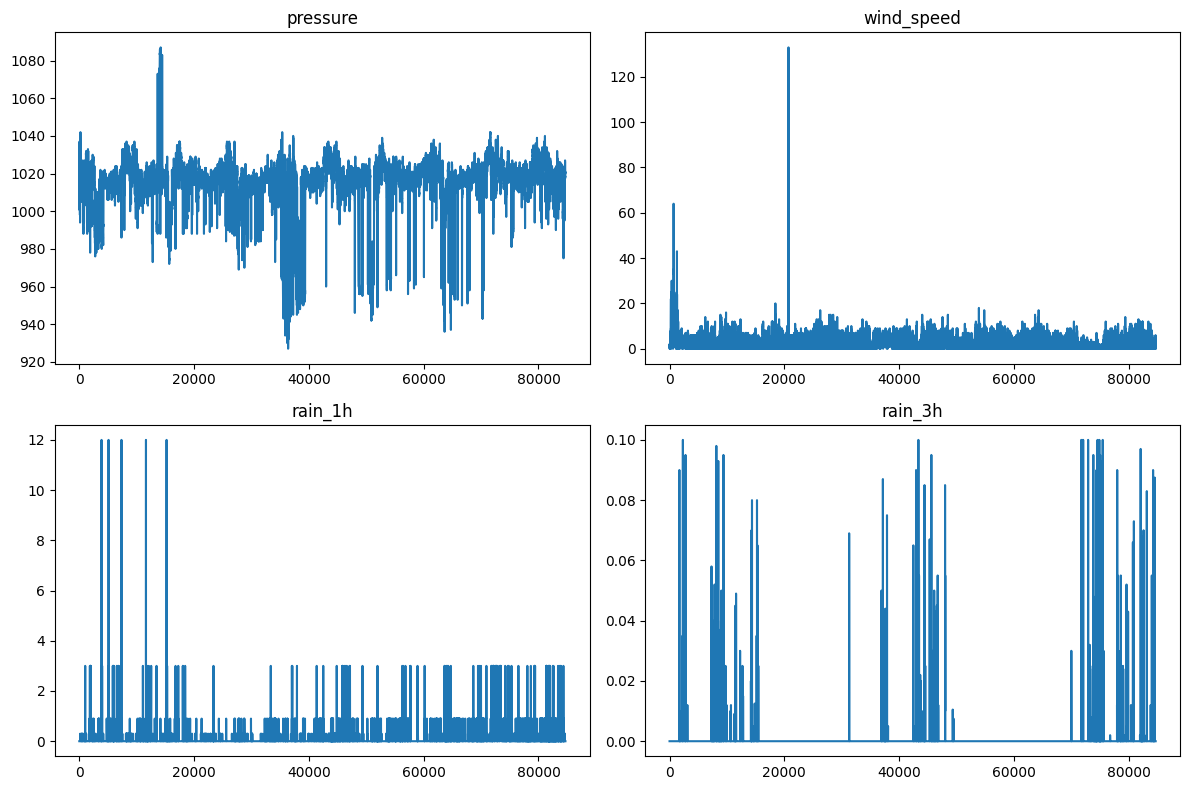

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))


columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']


for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.plot(df_weather.index, df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

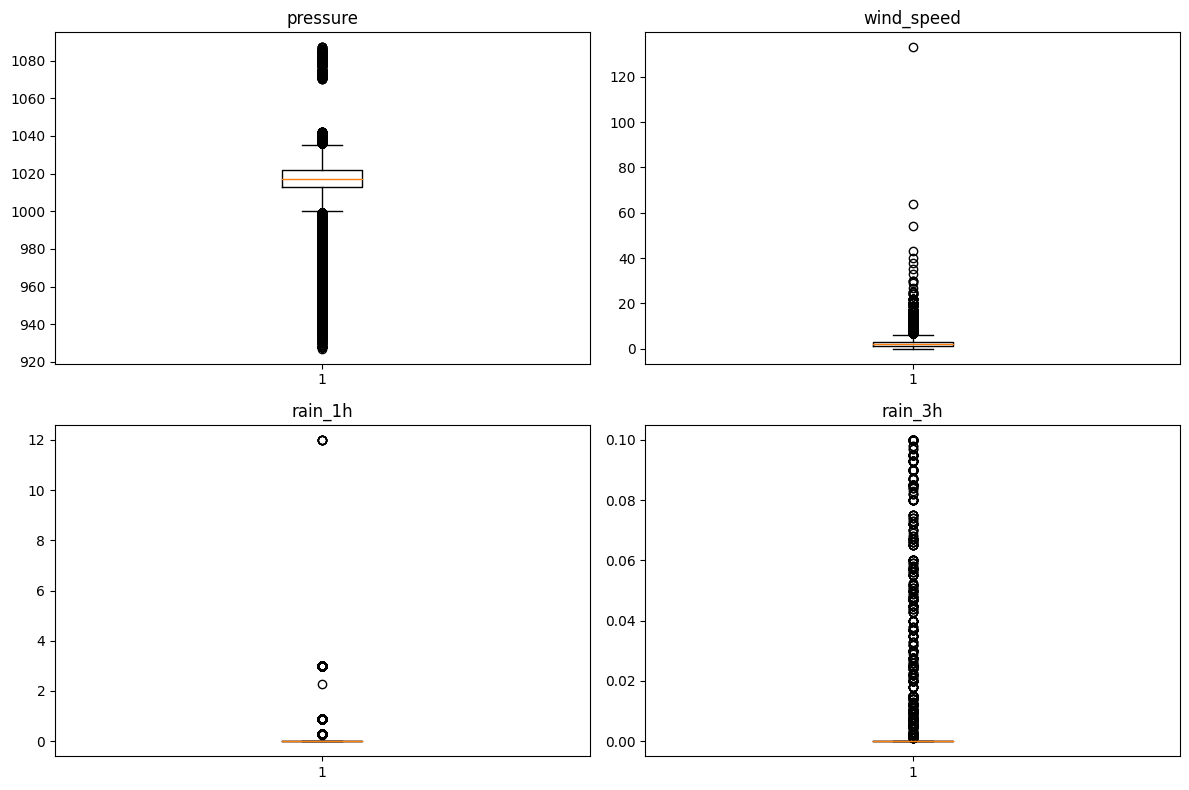

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))


columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']


for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [38]:
df_weather.describe()

temp      pressure      humidity    wind_speed      wind_deg  \
count  84699.000000  84699.000000  84699.000000  84699.000000  84699.000000   
mean     288.822465   1014.600161     64.937780      2.460513    168.096046   
std        8.293734     15.772875     22.787137      2.249478    120.766336   
min      264.132000    927.000000      0.000000      0.000000      0.000000   
25%      282.580000   1013.000000     48.000000      1.000000     50.000000   
50%      288.150000   1017.000000     67.000000      2.000000    170.000000   
75%      294.860000   1022.000000     84.000000      3.000000    280.000000   
max      313.330000   1087.000000    100.000000    133.000000    360.000000   

            rain_1h       rain_3h       snow_3h    clouds_all  
count  84699.000000  84699.000000  84699.000000  84699.000000  
mean       0.071468      0.000482      0.010032     25.438069  
std        0.316070      0.005670      0.322981     30.643516  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000     20.000000  
75%        0.000000      0.000000      0.000000     40.000000  
max       12.000000      0.100000     21.500000    100.000000

In [39]:
df_weather.loc[df_weather['pressure']  > 1080,  'pressure'] = np.nan
df_weather.loc[df_weather['pressure']   < 870,  'pressure'] = np.nan
df_weather.loc[df_weather['wind_speed'] > 113, 'wind_speed'] = np.nan

df_weather.interpolate(method ='linear', limit_direction ='forward', inplace = True)

In [40]:
df_weather.describe()

temp      pressure      humidity    wind_speed      wind_deg  \
count  84699.000000  84699.000000  84699.000000  84699.000000  84699.000000   
mean     288.822465   1014.557220     64.937780      2.459073    168.096046   
std        8.293734     15.636941     22.787137      2.204500    120.766336   
min      264.132000    927.000000      0.000000      0.000000      0.000000   
25%      282.580000   1013.000000     48.000000      1.000000     50.000000   
50%      288.150000   1017.000000     67.000000      2.000000    170.000000   
75%      294.860000   1022.000000     84.000000      3.000000    280.000000   
max      313.330000   1080.000000    100.000000     64.000000    360.000000   

            rain_1h       rain_3h       snow_3h    clouds_all  
count  84699.000000  84699.000000  84699.000000  84699.000000  
mean       0.071468      0.000482      0.010032     25.438069  
std        0.316070      0.005670      0.322981     30.643516  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000     20.000000  
75%        0.000000      0.000000      0.000000     40.000000  
max       12.000000      0.100000     21.500000    100.000000

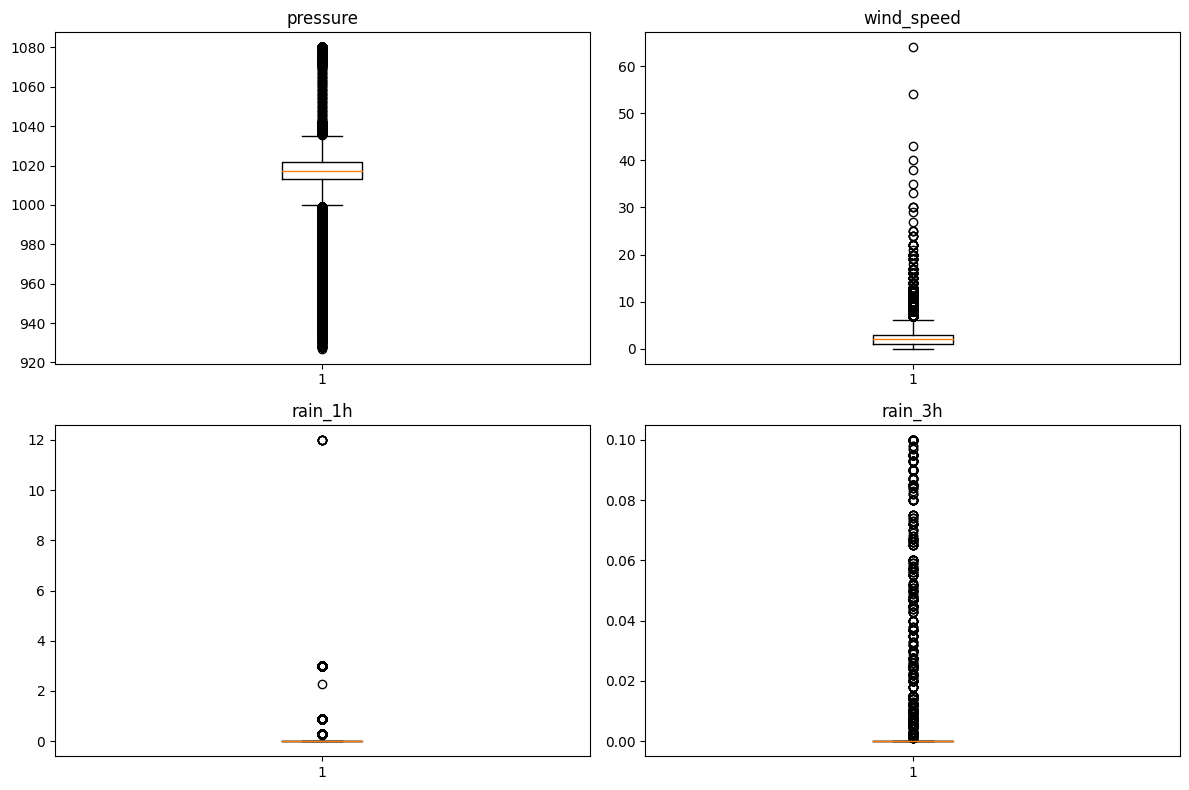

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))


columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [42]:

df_weather.drop(['rain_3h'], axis = 1 , inplace = True)

In [43]:
check_Nans_Dups(df_weather)

Number of Nans in each column :
dt_iso        0
city_name     0
temp          0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
snow_3h       0
clouds_all    0
dtype: int64

Number of duplicates in the dataframe : 1472


In [ ]:
df_weather_cleaned = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'], keep='first')

KeyError: Index(['time'], dtype='object')

In [ ]:
print(f'Number of samples in df_energy is {energy.shape[0]}')

city_list = df_weather['city_name'].unique()
grouped_weather = df_weather_cleaned.groupby('city_name')

for city in city_list:
    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')

Number of samples in df_energy is 11742


NameError: name 'df_weather_cleaned' is not defined

In [ ]:
df_weather_all_cities = [grouped_weather.get_group(x) for x in grouped_weather.groups]
df_weather_all_cities[0]

NameError: name 'grouped_weather' is not defined

In [ ]:
length_of_df_weather_all_cities = len(df_weather_all_cities)


In [ ]:
length_of_df_weather_all_cities

In [ ]:
df_weather_energy = energy

for df_city in df_weather_all_cities:
    city_name = df_city.iloc[0]['city_name'].replace(' ', '')
    df_temp_city = df_city.add_suffix(f'_{city_name}')
    df_weather_energy = pd.concat([df_weather_energy, df_temp_city], axis=1)
    df_weather_energy = df_weather_energy.drop(f'city_name_{city_name}' , axis=1)

In [ ]:
df_weather_energy.columns

In [ ]:
df_weather_energy.duplicated().sum()



In [ ]:
df_weather_energy.head()

In [ ]:
df_weather_energy.index = pd.to_datetime(df_weather_energy.index, utc=True)

In [ ]:
df_weather_energy.index = pd.to_datetime(df_weather_energy.index, utc=True)
df_weather_energy.index = pd.to_datetime(df_weather_energy.index)

df_weather_energy['hour'] = df_weather_energy.index.hour
df_weather_energy['weekday'] = df_weather_energy.index.weekday # <-- Corrected line
df_weather_energy['month'] = df_weather_energy.index.month
df_weather_energy['year'] = df_weather_energy.index.year

In [ ]:
df_weather_energy.head()

In [ ]:

df_temp_city = df_temp_city.reset_index(drop=True)


In [ ]:
df_weather_energy


In [118]:
##this is final one

In [119]:
# Loading weather data
df_weather = pd.read_csv('/content/weather_features.csv')

In [120]:
df_weather.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In [121]:
df_temp = df_weather.copy(deep = True)
labels = ['weather_id', 'weather_main','weather_description','weather_icon']
for col in labels:
    df_temp[col] = LabelEncoder().fit_transform(df_weather[col])

In [122]:
df_weather['weather_id'].unique()

array([800, 801, 802, 803, 804, 500, 501, 502, 701, 522, 521, 503, 202,
       200, 201, 211, 520, 300, 741, 301, 711, 302, 721, 310, 600, 616,
       615, 601, 210, 602, 611, 311, 612, 620, 531, 731, 761, 771])

In [123]:
col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon', 'temp_min', 'temp_max']
# col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon']
df_weather.drop(col_drop_name, axis = 1 , inplace = True)

In [124]:
# Checking Nans and duplicates in each columns
def check_Nans_Dups(df_input):

    print('Number of Nans in each column :')

    print(df_input.isnull().sum())
    print()
    print(f'Number of duplicates in the dataframe : {df_input.duplicated().sum()}')
    return
check_Nans_Dups(df_weather)

Number of Nans in each column :
dt_iso        0
city_name     0
temp          0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
rain_3h       0
snow_3h       0
clouds_all    0
dtype: int64

Number of duplicates in the dataframe : 3076


In [125]:
df_weather = df_weather.reset_index().drop_duplicates()

In [126]:
df_weather['time'] = pd.to_datetime(df_weather['dt_iso'])
df_weather.drop(["dt_iso"] , axis = 1, inplace = True)
df_weather = df_weather.set_index('time')
df_weather.drop(["index"] , axis = 1, inplace = True)

In [127]:
df_weather

city_name     temp  pressure  humidity  wind_speed  \
time                                                                           
2015-01-01 00:00:00+01:00  Valencia  270.475      1001        77           1   
2015-01-01 01:00:00+01:00  Valencia  270.475      1001        77           1   
2015-01-01 02:00:00+01:00  Valencia  269.686      1002        78           0   
2015-01-01 03:00:00+01:00  Valencia  269.686      1002        78           0   
2015-01-01 04:00:00+01:00  Valencia  269.686      1002        78           0   
...                             ...      ...       ...       ...         ...   
2018-12-31 19:00:00+01:00   Seville  287.760      1028        54           3   
2018-12-31 20:00:00+01:00   Seville  285.760      1029        62           3   
2018-12-31 21:00:00+01:00   Seville  285.150      1028        58           4   
2018-12-31 22:00:00+01:00   Seville  284.150      1029        57           4   
2018-12-31 23:00:00+01:00   Seville  283.970      1029        70           3   

                           wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
time                                                                        
2015-01-01 00:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 01:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 02:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 03:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 04:00:00+01:00        23      0.0      0.0      0.0           0  
...                             ...      ...      ...      ...         ...  
2018-12-31 19:00:00+01:00        30      0.0      0.0      0.0           0  
2018-12-31 20:00:00+01:00        30      0.0      0.0      0.0           0  
2018-12-31 21:00:00+01:00        50      0.0      0.0      0.0           0  
2018-12-31 22:00:00+01:00        60      0.0      0.0      0.0           0  
2018-12-31 23:00:00+01:00        50      0.0      0.0      0.0           0  

[178396 rows x 10 columns]

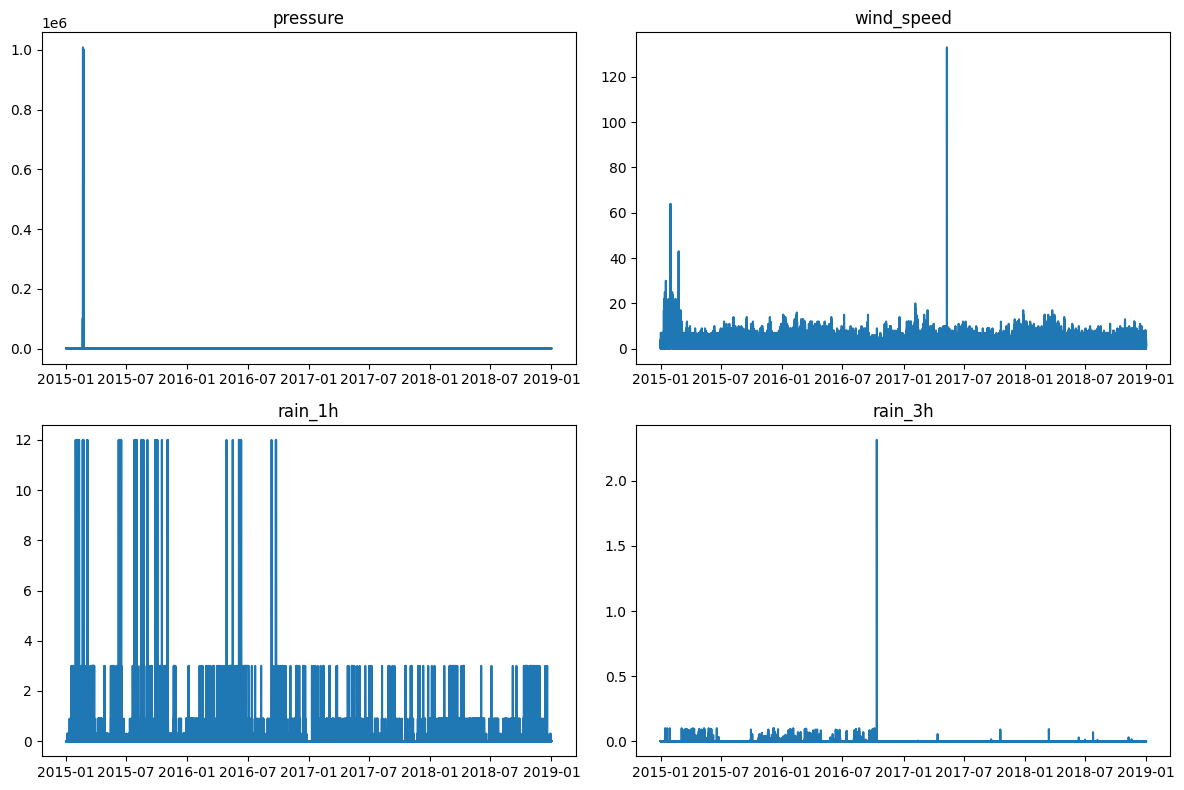

In [128]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.plot(df_weather.index, df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()


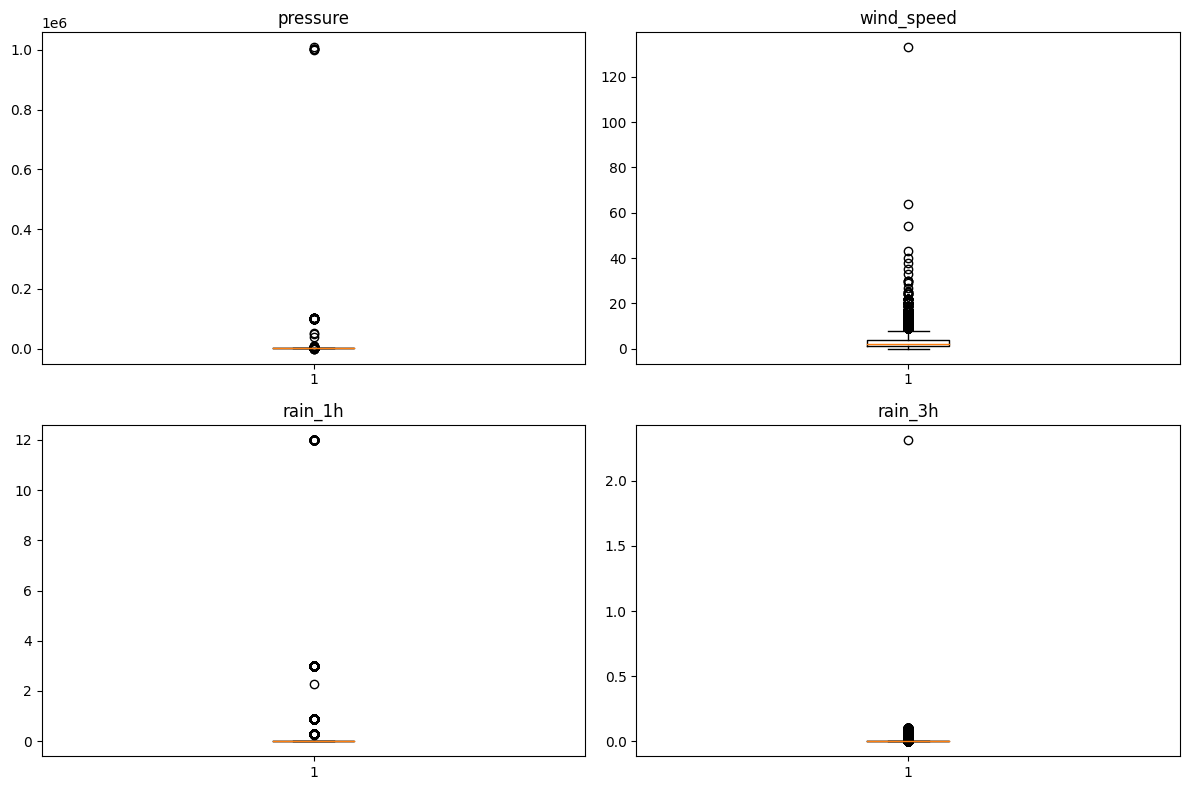

In [129]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# select the columns to plot
columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

# loop through the subplots and plot each column
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the plot

In [130]:
df_weather.loc[df_weather['pressure']  > 1080,  'pressure'] = np.nan
df_weather.loc[df_weather['pressure']   < 870,  'pressure'] = np.nan
df_weather.loc[df_weather['wind_speed'] > 113, 'wind_speed'] = np.nan

df_weather.interpolate(method ='linear', limit_direction ='forward', inplace = True)

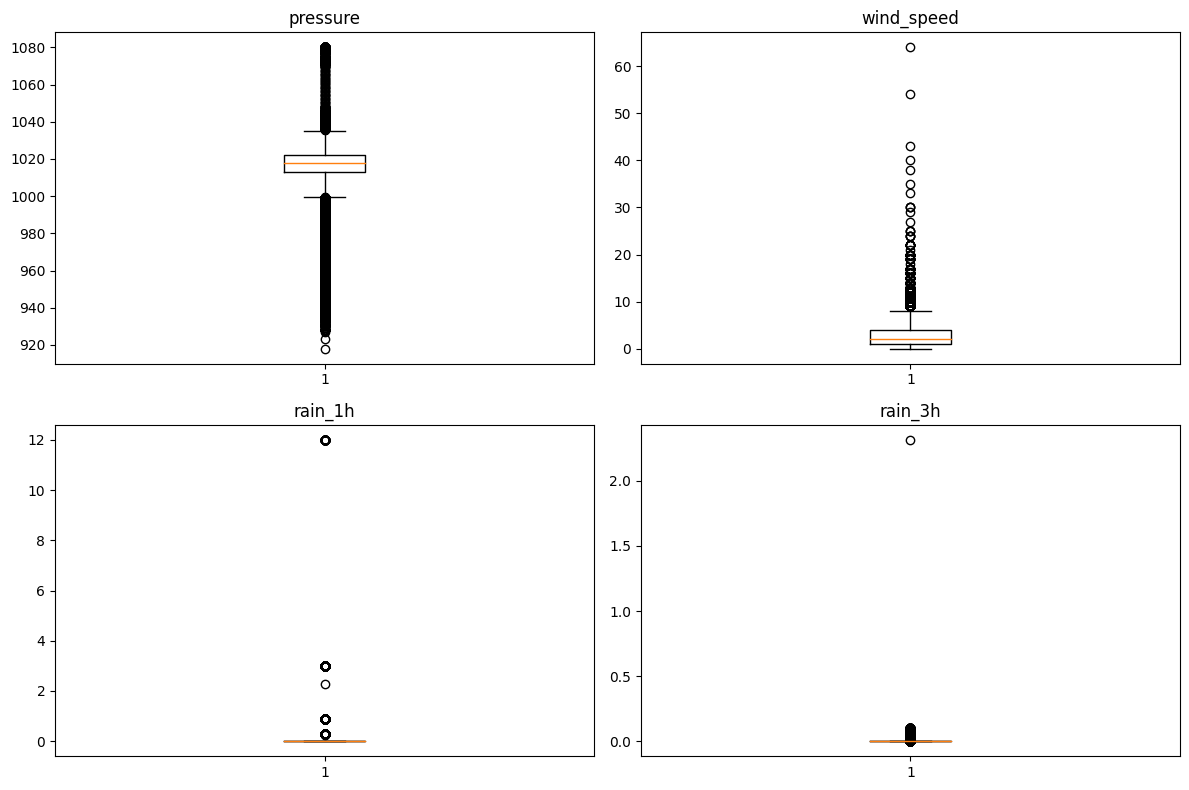

In [131]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# select the columns to plot
columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

# loop through the subplots and plot each column
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the plot

In [132]:
# be sure to drop rain_h3
df_weather.drop(['rain_3h'], axis = 1 , inplace = True)

In [133]:
print(f'Number of samples in df_energy is {energy.shape[0]}')

city_list = df_weather['city_name'].unique()
grouped_weather = df_weather.groupby('city_name')

for city in city_list:
    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')

Number of samples in df_energy is 35064
Number of samples in df_weather in Valencia is 35145
Number of samples in df_weather in Madrid is 36267
Number of samples in df_weather in Bilbao is 35951
Number of samples in df_weather in  Barcelona is 35476
Number of samples in df_weather in Seville is 35557


In [134]:
df_weather_cleaned = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'], keep='first').set_index('time')

In [135]:
df_weather_cleaned

city_name     temp  pressure  humidity  wind_speed  \
time                                                                           
2015-01-01 00:00:00+01:00  Valencia  270.475    1001.0        77         1.0   
2015-01-01 01:00:00+01:00  Valencia  270.475    1001.0        77         1.0   
2015-01-01 02:00:00+01:00  Valencia  269.686    1002.0        78         0.0   
2015-01-01 03:00:00+01:00  Valencia  269.686    1002.0        78         0.0   
2015-01-01 04:00:00+01:00  Valencia  269.686    1002.0        78         0.0   
...                             ...      ...       ...       ...         ...   
2018-12-31 19:00:00+01:00   Seville  287.760    1028.0        54         3.0   
2018-12-31 20:00:00+01:00   Seville  285.760    1029.0        62         3.0   
2018-12-31 21:00:00+01:00   Seville  285.150    1028.0        58         4.0   
2018-12-31 22:00:00+01:00   Seville  284.150    1029.0        57         4.0   
2018-12-31 23:00:00+01:00   Seville  283.970    1029.0        70         3.0   

                           wind_deg  rain_1h  snow_3h  clouds_all  
time                                                               
2015-01-01 00:00:00+01:00        62      0.0      0.0           0  
2015-01-01 01:00:00+01:00        62      0.0      0.0           0  
2015-01-01 02:00:00+01:00        23      0.0      0.0           0  
2015-01-01 03:00:00+01:00        23      0.0      0.0           0  
2015-01-01 04:00:00+01:00        23      0.0      0.0           0  
...                             ...      ...      ...         ...  
2018-12-31 19:00:00+01:00        30      0.0      0.0           0  
2018-12-31 20:00:00+01:00        30      0.0      0.0           0  
2018-12-31 21:00:00+01:00        50      0.0      0.0           0  
2018-12-31 22:00:00+01:00        60      0.0      0.0           0  
2018-12-31 23:00:00+01:00        50      0.0      0.0           0  

[175320 rows x 9 columns]

In [136]:
print(f'Number of samples in df_energy is {energy.shape[0]}')

city_list = df_weather['city_name'].unique()
grouped_weather = df_weather_cleaned.groupby('city_name')

for city in city_list:
    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')

Number of samples in df_energy is 35064
Number of samples in df_weather in Valencia is 35064
Number of samples in df_weather in Madrid is 35064
Number of samples in df_weather in Bilbao is 35064
Number of samples in df_weather in  Barcelona is 35064
Number of samples in df_weather in Seville is 35064


In [137]:
df_weather_all_cities = [grouped_weather.get_group(x) for x in grouped_weather.groups]

In [138]:
df_weather_energy = energy

for df_city in df_weather_all_cities:
    city_name = df_city.iloc[0]['city_name'].replace(' ', '')
    df_temp_city = df_city.add_suffix(f'_convert_{city_name}')
    df_weather_energy = pd.concat([df_weather_energy, df_temp_city], axis=1)
    df_weather_energy = df_weather_energy.drop(f'city_name_convert_{city_name}' , axis=1)


In [139]:
df_weather_energy.columns

Index(['generation biomass', 'generation fossil gas', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'Energy Consumption',
       'generation fossil total', 'temp_convert_Barcelona',
       'pressure_convert_Barcelona', 'humidity_convert_Barcelona',
       'wind_speed_convert_Barcelona', 'wind_deg_convert_Barcelona',
       'rain_1h_convert_Barcelona', 'snow_3h_convert_Barcelona',
       'clouds_all_convert_Barcelona', 'temp_convert_Bilbao',
       'pressure_convert_Bilbao', 'humidity_convert_Bilbao',
       'wind_speed_convert_Bilbao', 'wind_deg_convert_Bilbao',
       'rain_1h_convert_Bilbao', 'snow_3h_convert_Bilbao',
       'clouds_all_convert_Bilbao', 'temp_convert_Madrid',
       'pressure_convert_Madrid

In [140]:
check_Nans_Dups(df_weather_energy)

Number of Nans in each column :
generation biomass                             0
generation fossil gas                          0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
Energy Consumption                             0
generation fossil total                        0
temp_convert_Barcelona                         0
pressure_convert_Barcelona                     0
humidity_convert_Barcelona                     0
wind_speed_convert_Barcelona                   0
wind_deg_convert_Barcelona                     0
rain_1h_convert_Barcelona            

In [141]:

df_weather_energy['hour'] = df_weather_energy.index.map(lambda x : x.hour)
df_weather_energy['weekday'] = df_weather_energy.index.map(lambda x : x.weekday())
df_weather_energy['month'] = df_weather_energy.index.map(lambda x : x.month)
df_weather_energy['year'] = df_weather_energy.index.map(lambda x: x.year)

In [142]:
df_weather_energy.head(100)

generation biomass  generation fossil gas  \
time                                                                   
2015-01-01 00:00:00+01:00               447.0                 4844.0   
2015-01-01 01:00:00+01:00               449.0                 5196.0   
2015-01-01 02:00:00+01:00               448.0                 4857.0   
2015-01-01 03:00:00+01:00               438.0                 4314.0   
2015-01-01 04:00:00+01:00               428.0                 4130.0   
...                                       ...                    ...   
2015-01-04 23:00:00+01:00               403.0                 3390.0   
2015-01-05 00:00:00+01:00               373.0                 5338.0   
2015-01-05 01:00:00+01:00               363.0                 5352.0   
2015-01-05 02:00:00+01:00               359.0                 4791.0   
2015-01-05 03:00:00+01:00               346.5                 4590.5   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   
...                                          ...   
2015-01-04 23:00:00+01:00                  391.0   
2015-01-05 00:00:00+01:00                  352.0   
2015-01-05 01:00:00+01:00                  310.0   
2015-01-05 02:00:00+01:00                  311.0   
2015-01-05 03:00:00+01:00                  309.5   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   
...                                                                ...   
2015-01-04 23:00:00+01:00                                         79.0   
2015-01-05 00:00:00+01:00                                        650.0   
2015-01-05 01:00:00+01:00                                        938.0   
2015-01-05 02:00:00+01:00                                       1021.0   
2015-01-05 03:00:00+01:00                                       1544.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                      1051.0   
2015-01-01 01:00:00+01:00                                      1009.0   
2015-01-01 02:00:00+01:00                                       973.0   
2015-01-01 03:00:00+01:00                                       949.0   
2015-01-01 04:00:00+01:00                                       953.0   
...                                                               ...   
2015-01-04 23:00:00+01:00                                      1467.0   
2015-01-05 00:00:00+01:00                                      1182.0   
2015-01-05 01:00:00+01:00                                      1099.0   
2015-01-05 02:00:00+01:00                                      1076.0   
2015-01-05 03:00:00+01:00                                      1029.0   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                            1899.0   
2015-01-01 01:00:00+01:00                            1658.0   
2015-01-01 02:00:00+01:00                            1371.0   
2015-01-01 03:00:00+01:00                             779.0   
2015-01-01 04:00:00+01:00                             720.0   
...                                                     ...

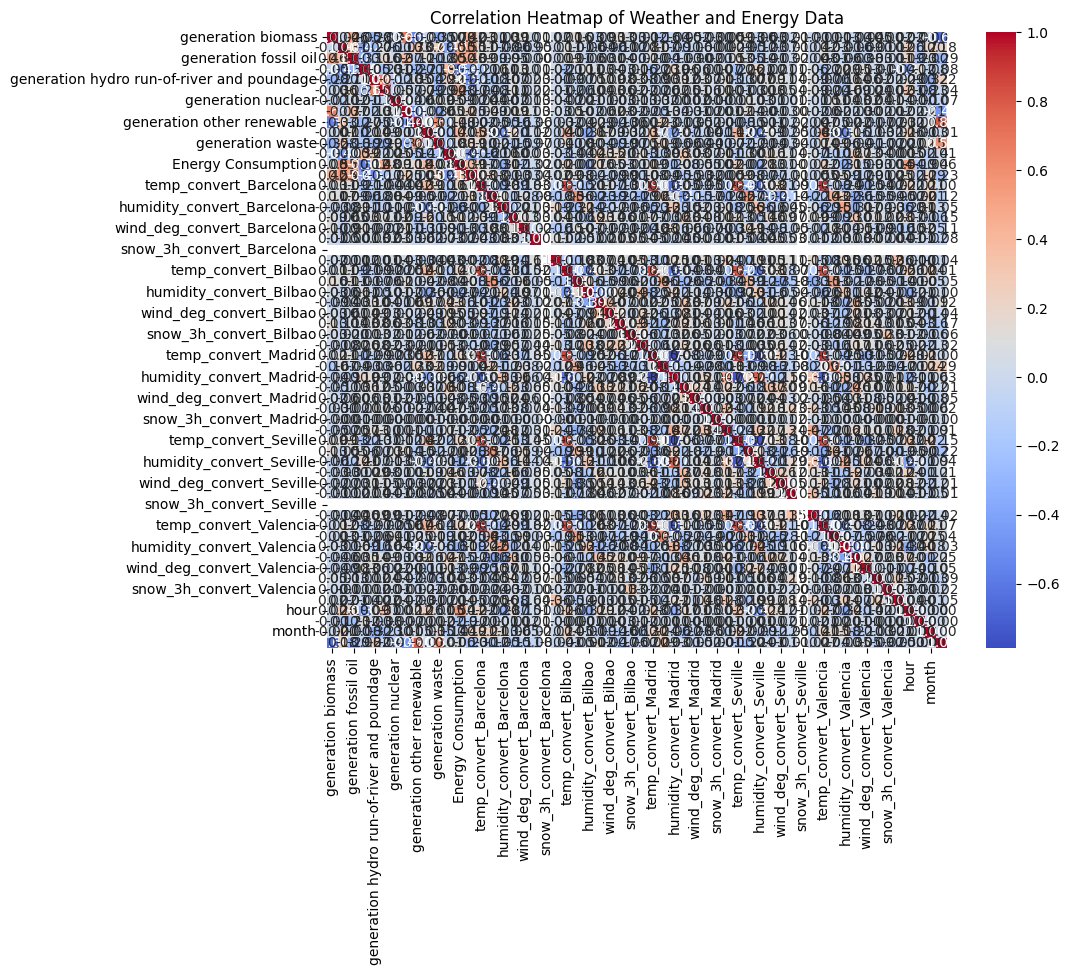

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_weather_energy.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Weather and Energy Data')
plt.show()


In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'generation biomass',
    'generation fossil gas',
    'generation fossil oil',
    'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage',
    'generation hydro water reservoir',
    'generation nuclear',
    'generation other',
    'generation other renewable',
    'generation solar',
    'generation waste',
    'generation wind onshore',
    'Energy Consumption',
    'generation fossil total'
}

# Create a DataFrame
df = pd.DataFrame(data, index=[0])

# Generate heatmap
plt.figure(figsize=(10, 8))
heatmap_data = df.drop(columns=['temp_convert_Bilbao', 'pressure_convert_Bilbao', 'humidity_convert_Bilbao',
                                 'wind_speed_convert_Bilbao', 'wind_deg_convert_Bilbao', 'rain_1h_convert_Bilbao',
                                 'snow_3h_convert_Bilbao', 'clouds_all_convert_Bilbao'])
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='', linewidths=.5)
plt.title('Heatmap for Bilbao City')
plt.show()


ValueError: Shape of passed values is (14, 1), indices imply (1, 1)

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plots
num_features = len(features)
fig, axes = plt.subplots(5, num_features, figsize=(5 * num_features, 5))

for ax, feature in zip(axes, features):
    plt.scatter(feature,'Energy Consumption', color='blue', marker='o')
    ax.set_xlabel(feature)
    ax.set_ylabel('Energy Consumption')
    # ax.legend()

plt.tight_layout()
plt.show()

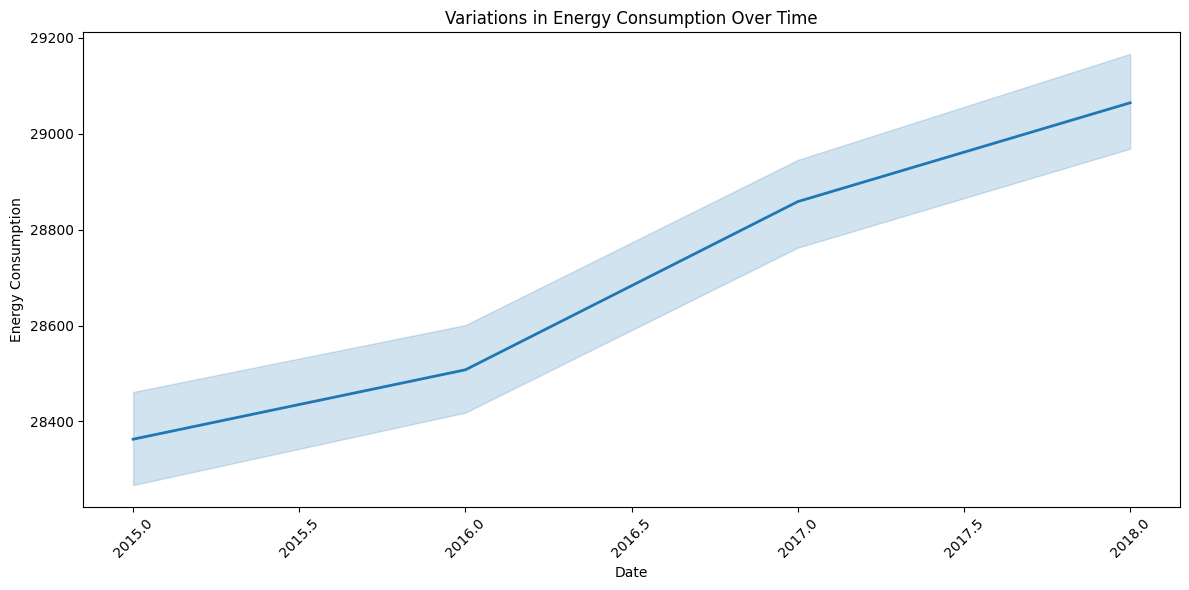

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot line plot
sns.lineplot(data=df_weather_energy, x='year', y='Energy Consumption', lw=2)

# Add labels and title
plt.title('Variations in Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


<Axes: xlabel='time'>

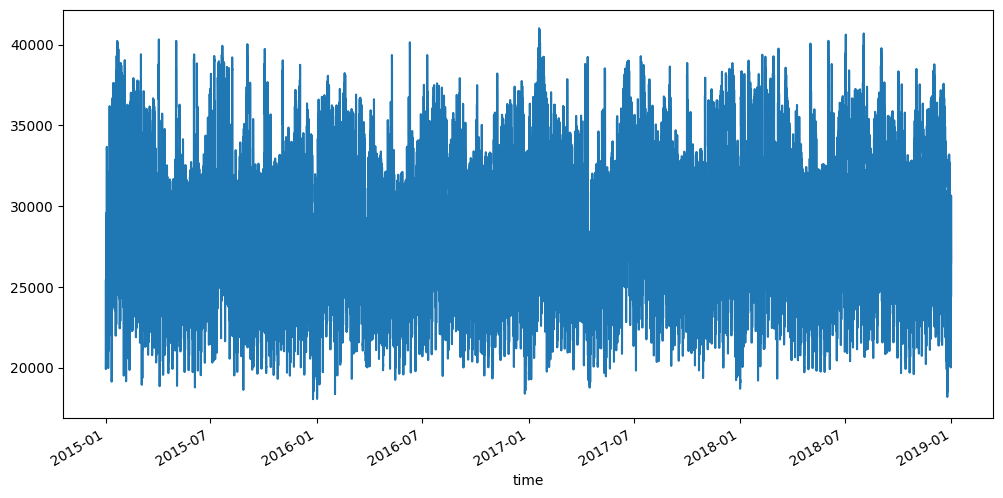

In [145]:
pre_data=df_weather_energy['Energy Consumption'];
pre_data.plot(figsize=(12,6))



In [146]:
# y_2015 = df_weather_energy.loc['2015-01-01 00:00:00+01:00':'2015-12-31 00:00:00+01:00']
# pre_data=y_2015['Energy Consumption'];
# pre_data.plot(figsize=(12,6))

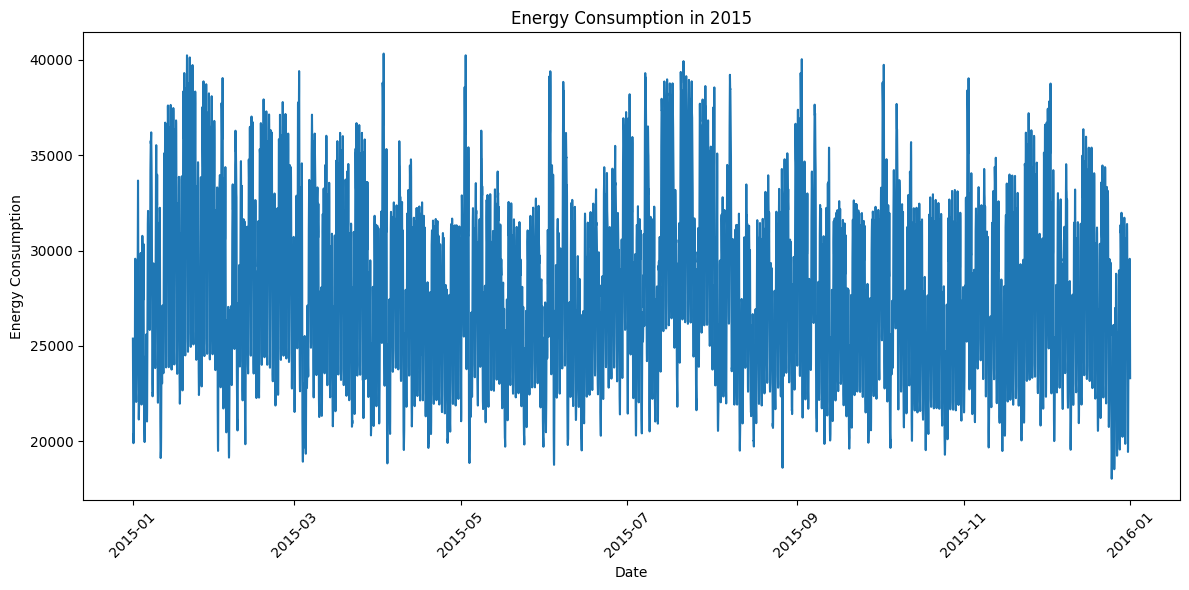

In [147]:
y_2015 = df_weather_energy[df_weather_energy['year'] == 2015]

# Plot the energy consumption data
plt.figure(figsize=(12, 6))
plt.plot( y_2015['Energy Consumption'])
plt.title('Energy Consumption in 2015')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [148]:
import pandas as pd

# Assuming df_weather_energy is already defined and contains 'Energy Consumption' column
testtraindata = pd.DataFrame()  # Ensure testtraindata is an empty DataFrame

# Add 'energy consumption' column to testtraindata
testtraindata['energy consumption'] = df_weather_energy['Energy Consumption'].values

# Define the number of lag periods
num_lags = 7

# Add lagged columns to testtraindata
for lag in range(1, num_lags + 1):
    testtraindata[f'lag_{lag}'] = testtraindata['energy consumption'].shift(lag)

# Display the first few rows to check if the lagged columns are populated
print(testtraindata.head(30))
print(testtraindata.columns)  # Check the column names


    energy consumption    lag_1    lag_2    lag_3    lag_4    lag_5    lag_6  \
0              25385.0      NaN      NaN      NaN      NaN      NaN      NaN   
1              24382.0  25385.0      NaN      NaN      NaN      NaN      NaN   
2              22734.0  24382.0  25385.0      NaN      NaN      NaN      NaN   
3              21286.0  22734.0  24382.0  25385.0      NaN      NaN      NaN   
4              20264.0  21286.0  22734.0  24382.0  25385.0      NaN      NaN   
5              19905.0  20264.0  21286.0  22734.0  24382.0  25385.0      NaN   
6              20010.0  19905.0  20264.0  21286.0  22734.0  24382.0  25385.0   
7              20377.0  20010.0  19905.0  20264.0  21286.0  22734.0  24382.0   
8              20094.0  20377.0  20010.0  19905.0  20264.0  21286.0  22734.0   
9              20637.0  20094.0  20377.0  20010.0  19905.0  20264.0  21286.0   
10             22250.0  20637.0  20094.0  20377.0  20010.0  19905.0  20264.0   
11             23547.0  22250.0  20637.0

In [149]:
testtraindata.reset_index(drop=True, inplace=True)
testtraindata.head(30)

energy consumption    lag_1    lag_2    lag_3    lag_4    lag_5    lag_6  \
0              25385.0      NaN      NaN      NaN      NaN      NaN      NaN   
1              24382.0  25385.0      NaN      NaN      NaN      NaN      NaN   
2              22734.0  24382.0  25385.0      NaN      NaN      NaN      NaN   
3              21286.0  22734.0  24382.0  25385.0      NaN      NaN      NaN   
4              20264.0  21286.0  22734.0  24382.0  25385.0      NaN      NaN   
5              19905.0  20264.0  21286.0  22734.0  24382.0  25385.0      NaN   
6              20010.0  19905.0  20264.0  21286.0  22734.0  24382.0  25385.0   
7              20377.0  20010.0  19905.0  20264.0  21286.0  22734.0  24382.0   
8              20094.0  20377.0  20010.0  19905.0  20264.0  21286.0  22734.0   
9              20637.0  20094.0  20377.0  20010.0  19905.0  20264.0  21286.0   
10             22250.0  20637.0  20094.0  20377.0  20010.0  19905.0  20264.0   
11             23547.0  22250.0  20637.0  20094.0  20377.0  20010.0  19905.0   
12             24133.0  23547.0  22250.0  20637.0  20094.0  20377.0  20010.0   
13             24713.0  24133.0  23547.0  22250.0  20637.0  20094.0  20377.0   
14             24672.0  24713.0  24133.0  23547.0  22250.0  20637.0  20094.0   
15             23528.0  24672.0  24713.0  24133.0  23547.0  22250.0  20637.0   
16             23118.0  23528.0  24672.0  24713.0  24133.0  23547.0  22250.0   
17             23606.0  23118.0  23528.0  24672.0  24713.0  24133.0  23547.0   
18             26447.0  23606.0  23118.0  23528.0  24672.0  24713.0  24133.0   
19             28020.0  26447.0  23606.0  23118.0  23528.0  24672.0  24713.0   
20             29014.0  28020.0  26447.0  23606.0  23118.0  23528.0  24672.0   
21             29571.0  29014.0  28020.0  26447.0  23606.0  23118.0  23528.0   
22             29031.0  29571.0  29014.0  28020.0  26447.0  23606.0  23118.0   
23             26798.0  29031.0  29571.0  29014.0  28020.0  26447.0  23606.0   
24             27070.0  26798.0  29031.0  29571.0  29014.0  28020.0  26447.0   
25             24935.0  27070.0  26798.0  29031.0  29571.0  29014.0  28020.0   
26             23214.0  24935.0  27070.0  26798.0  29031.0  29571.0  29014.0   
27             22540.0  23214.0  24935.0  27070.0  26798.0  29031.0  29571.0   
28             22096.0  22540.0  23214.0  24935.0  27070.0  26798.0  29031.0   
29             22066.0  22096.0  22540.0  23214.0  24935.0  27070.0  26798.0   

      lag_7  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7   25385.0  
8   24382.0  
9   22734.0  
10  21286.0  
11  20264.0  
12  19905.0  
13  20010.0  
14  20377.0  
15  20094.0  
16  20637.0  
17  22250.0  
18  23547.0  
19  24133.0  
20  24713.0  
21  24672.0  
22  23528.0  
23  23118.0  
24  23606.0  
25  26447.0  
26  28020.0  
27  29014.0  
28  29571.0  
29  29031.0

In [150]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Split data into train and test sets
train_size = int(len(testtraindata) * 0.8)
train, test = testtraindata[:train_size], testtraindata[train_size:]


In [151]:
data_without_index = testtraindata.values
testtraindata_no_index = pd.DataFrame(data_without_index, columns=testtraindata.columns)


In [152]:
X_train=train.drop(['energy consumption'],axis=1)
y_train=train['energy consumption']
X_test=test.drop(['energy consumption'],axis=1)
y_test=test['energy consumption']

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Assuming testtraindata contains the lagged columns and the target 'energy consumption'
# Drop rows with NaN values generated by shifting
testtraindata.dropna(inplace=True)

# Define features and target
features = testtraindata.drop(['energy consumption'], axis=1)
target = testtraindata['energy consumption']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, shuffle=False)

# Reshape input to be 3D (samples, timesteps, features) as required by LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=1, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
28045/28045 [==============================] - 241s 8ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 2/10
28045/28045 [==============================] - 234s 8ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 3/10
28045/28045 [==============================] - 235s 8ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 4/10
28045/28045 [==============================] - 235s 8ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/10
28045/28045 [==============================] - 237s 8ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 6/10
28045/28045 [==============================] - 239s 9ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/10
28045/28045 [==============================] - 233s 8ms/step - loss: 0.0013 - val_loss: 9.4630e-04
Epoch 8/10
28045/28045 [==============================] - 241s 9ms/step - loss: 0.0012 - val_loss: 9.2167e-04
Epoch 9/10
18620/28045 [==================>...........] - ETA: 1:14 - loss: 0.0010

220/220 [==============================] - 1s 4ms/step


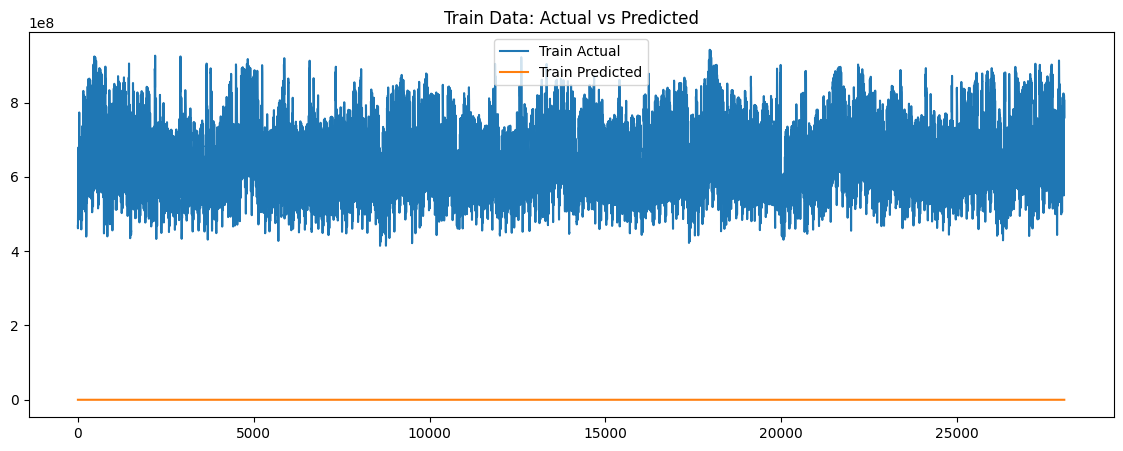

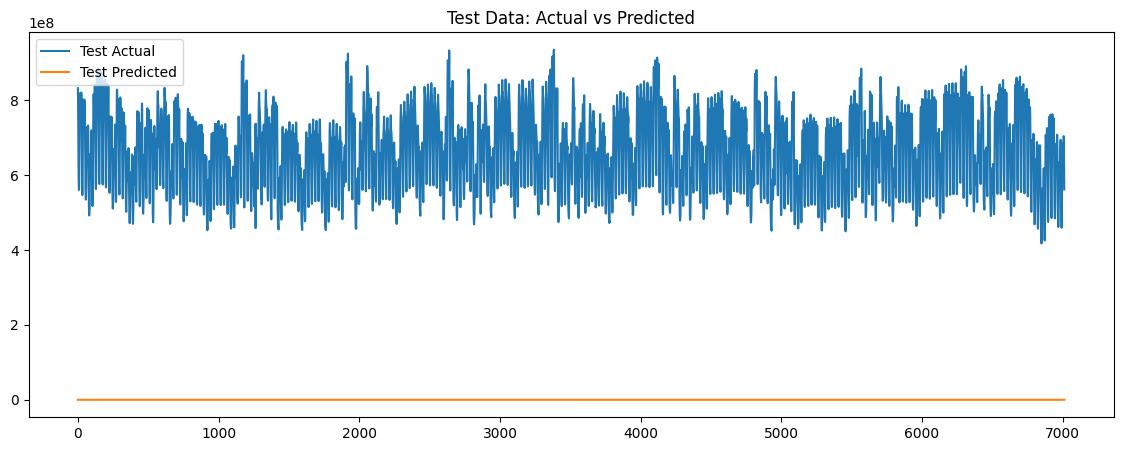

In [100]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_train, label='Train Actual')
plt.plot(train_predictions, label='Train Predicted')
plt.title('Train Data: Actual vs Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Test Actual')
plt.plot(test_predictions, label='Test Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.legend()
plt.show()


In [101]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, test_predictions )


rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
df_weather_energy['Energy Consumption'].mean()

RMSE: 671114779.8034277


28698.281385466576

In [68]:
from sklearn.metrics import r2_score

# Calculate R^2 score for training set
train_r2 = r2_score(y_train, train_predictions)

# Calculate R^2 score for testing set
test_r2 = r2_score(y_test, test_predictions)

print(f'Train R^2 Score: {train_r2}')
print(f'Test R^2 Score: {test_r2}')


Train R^2 Score: 0.9684491887970108
Test R^2 Score: 0.9673443919165806


In [ ]:
testtraindata.head()

energy consumption    lag_1    lag_2    lag_3    lag_4    lag_5    lag_6  \
7              20377.0  20010.0  19905.0  20264.0  21286.0  22734.0  24382.0   
8              20094.0  20377.0  20010.0  19905.0  20264.0  21286.0  22734.0   
9              20637.0  20094.0  20377.0  20010.0  19905.0  20264.0  21286.0   
10             22250.0  20637.0  20094.0  20377.0  20010.0  19905.0  20264.0   
11             23547.0  22250.0  20637.0  20094.0  20377.0  20010.0  19905.0   

      lag_7  
7   25385.0  
8   24382.0  
9   22734.0  
10  21286.0  
11  20264.0

In [ ]:
df_weather_energy

generation biomass  generation fossil gas  \
time                                                                   
2015-01-01 00:00:00+01:00               447.0                 4844.0   
2015-01-01 01:00:00+01:00               449.0                 5196.0   
2015-01-01 02:00:00+01:00               448.0                 4857.0   
2015-01-01 03:00:00+01:00               438.0                 4314.0   
2015-01-01 04:00:00+01:00               428.0                 4130.0   
...                                       ...                    ...   
2018-12-31 19:00:00+01:00                 NaN                    NaN   
2018-12-31 20:00:00+01:00                 NaN                    NaN   
2018-12-31 21:00:00+01:00                 NaN                    NaN   
2018-12-31 22:00:00+01:00                 NaN                    NaN   
2018-12-31 23:00:00+01:00                 NaN                    NaN   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   
...                                          ...   
2018-12-31 19:00:00+01:00                    NaN   
2018-12-31 20:00:00+01:00                    NaN   
2018-12-31 21:00:00+01:00                    NaN   
2018-12-31 22:00:00+01:00                    NaN   
2018-12-31 23:00:00+01:00                    NaN   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   
...                                                                ...   
2018-12-31 19:00:00+01:00                                          NaN   
2018-12-31 20:00:00+01:00                                          NaN   
2018-12-31 21:00:00+01:00                                          NaN   
2018-12-31 22:00:00+01:00                                          NaN   
2018-12-31 23:00:00+01:00                                          NaN   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                      1051.0   
2015-01-01 01:00:00+01:00                                      1009.0   
2015-01-01 02:00:00+01:00                                       973.0   
2015-01-01 03:00:00+01:00                                       949.0   
2015-01-01 04:00:00+01:00                                       953.0   
...                                                               ...   
2018-12-31 19:00:00+01:00                                         NaN   
2018-12-31 20:00:00+01:00                                         NaN   
2018-12-31 21:00:00+01:00                                         NaN   
2018-12-31 22:00:00+01:00                                         NaN   
2018-12-31 23:00:00+01:00                                         NaN   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                            1899.0   
2015-01-01 01:00:00+01:00                            1658.0   
2015-01-01 02:00:00+01:00                            1371.0   
2015-01-01 03:00:00+01:00                             779.0   
2015-01-01 04:00:00+01:00                             720.0   
...                                                     ...

In [ ]:
pmodel = ARIMA(endog=X_train, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

ValueError: SARIMAX models require univariate `endog`. Got shape (28051, 7).

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Define the number of lag periods
num_lags = 7

# Check for missing values
if testtraindata['energy consumption'].isnull().any():
    print("Warning: There are missing values in the 'energy consumption' column.")

# Add lagged columns to testtraindata
for lag in range(1, num_lags + 1):
    testtraindata[f'lag_{lag}'] = testtraindata['energy consumption'].shift(lag)

# Display the first few rows to check if the lagged columns are populated
print(testtraindata.head())


time
2015-01-01 00:00:00+01:00    25385.0
2015-01-01 01:00:00+01:00    24382.0
2015-01-01 02:00:00+01:00    22734.0
2015-01-01 03:00:00+01:00    21286.0
2015-01-01 04:00:00+01:00    20264.0
Name: Energy Consumption, dtype: object


In [ ]:
testtraindata.head()

time
2015-01-01 00:00:00+01:00    25385.0
2015-01-01 01:00:00+01:00    24382.0
2015-01-01 02:00:00+01:00    22734.0
2015-01-01 03:00:00+01:00    21286.0
2015-01-01 04:00:00+01:00    20264.0
Name: Energy Consumption, dtype: object

In [ ]:
y_2015 = df_weather_energy.loc[(df_weather_energy['year'] == 2015) | (df_weather_energy['year'] == 2016)]

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Split data into train and test sets
train_size = int(len(df_weather_energy) * 0.8)
train, test = df_weather_energy[:train_size], df_weather_energy[train_size:]


In [ ]:
train_target = train['Energy Consumption']
test_target = test['Energy Consumption']

In [ ]:
# Fit the ARIMA model
model = ARIMA(train_target, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
predictions = model_fit.forecast(steps=len(test_target))

In [ ]:
# Evaluate the model
mae = mean_absolute_error(test_target, predictions)
print(f'Mean Absolute Error: {mae:.3f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_target.index, train_target, label='Train')
plt.plot(test_target.index, test_target, label='Test')
plt.plot(test_target.index, predictions, label='Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Price Actual')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()


NameError: name 'test_target' is not defined

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
r2 = r2_score(test_target, predictions)
print(f'R² Score: {r2:.3f}')

NameError: name 'test_target' is not defined

In [74]:
df_weather_energy.columns

Index(['generation biomass', 'generation fossil gas', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'Energy Consumption',
       'generation fossil total', 'temp_convert_Ba', 'pressure_convert_Ba',
       'humidity_convert_Ba', 'wind_speed_convert_Ba', 'wind_deg_convert_Ba',
       'rain_1h_convert_Ba', 'snow_3h_convert_Ba', 'clouds_all_convert_Ba',
       'temp_convert_Barcelona', 'pressure_convert_Barcelona',
       'humidity_convert_Barcelona', 'wind_speed_convert_Barcelona',
       'wind_deg_convert_Barcelona', 'rain_1h_convert_Barcelona',
       'snow_3h_convert_Barcelona', 'clouds_all_convert_Barcelona',
       'temp_convert_Bilbao', 'pressure_convert_Bilbao',
       'humidity_convert_Bilbao', 'wind_spe

In [75]:
energy

generation biomass  generation fossil gas  \
time                                                                   
2015-01-01 00:00:00+01:00               447.0                 4844.0   
2015-01-01 01:00:00+01:00               449.0                 5196.0   
2015-01-01 02:00:00+01:00               448.0                 4857.0   
2015-01-01 03:00:00+01:00               438.0                 4314.0   
2015-01-01 04:00:00+01:00               428.0                 4130.0   
...                                       ...                    ...   
2017-09-04 11:00:00+02:00               259.0                 3774.0   
2017-09-04 12:00:00+02:00               260.0                 3788.0   
2017-09-04 13:00:00+02:00               261.0                 3740.0   
2017-09-04 14:00:00+02:00               262.0                 3854.0   
2017-09-04 15:00:00+02:00               273.0                 3768.0   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   
...                                          ...   
2017-09-04 11:00:00+02:00                  256.0   
2017-09-04 12:00:00+02:00                  260.0   
2017-09-04 13:00:00+02:00                  257.0   
2017-09-04 14:00:00+02:00                  263.0   
2017-09-04 15:00:00+02:00                  262.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   
...                                                                ...   
2017-09-04 11:00:00+02:00                                        207.0   
2017-09-04 12:00:00+02:00                                        495.0   
2017-09-04 13:00:00+02:00                                        671.0   
2017-09-04 14:00:00+02:00                                       1279.0   
2017-09-04 15:00:00+02:00                                       1849.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                      1051.0   
2015-01-01 01:00:00+01:00                                      1009.0   
2015-01-01 02:00:00+01:00                                       973.0   
2015-01-01 03:00:00+01:00                                       949.0   
2015-01-01 04:00:00+01:00                                       953.0   
...                                                               ...   
2017-09-04 11:00:00+02:00                                      1078.0   
2017-09-04 12:00:00+02:00                                      1085.0   
2017-09-04 13:00:00+02:00                                      1053.0   
2017-09-04 14:00:00+02:00                                      1043.0   
2017-09-04 15:00:00+02:00                                      1021.0   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                            1899.0   
2015-01-01 01:00:00+01:00                            1658.0   
2015-01-01 02:00:00+01:00                            1371.0   
2015-01-01 03:00:00+01:00                             779.0   
2015-01-01 04:00:00+01:00                             720.0   
...                                                     ...

In [76]:
df_weather_cleaned

city_name     temp  pressure  humidity  \
time                                                                 
2015-01-01 00:00:00+01:00    Valencia  270.475    1001.0      77.0   
2015-01-01 01:00:00+01:00    Valencia  270.475    1001.0      77.0   
2015-01-01 02:00:00+01:00    Valencia  269.686    1002.0      78.0   
2015-01-01 03:00:00+01:00    Valencia  269.686    1002.0      78.0   
2015-01-01 04:00:00+01:00    Valencia  269.686    1002.0      78.0   
...                               ...      ...       ...       ...   
2016-09-07 18:00:00+02:00   Barcelona  300.310    1016.0      57.0   
2016-09-07 19:00:00+02:00   Barcelona  299.240    1016.0      57.0   
2016-09-07 20:00:00+02:00   Barcelona  298.230    1016.0      57.0   
2016-09-07 21:00:00+02:00   Barcelona  297.360    1015.0      65.0   
2016-09-07 22:00:00+02:00          Ba  297.360    1015.0      65.0   

                           wind_speed  wind_deg  rain_1h  snow_3h  clouds_all  
time                                                                           
2015-01-01 00:00:00+01:00         1.0      62.0      0.0      0.0         0.0  
2015-01-01 01:00:00+01:00         1.0      62.0      0.0      0.0         0.0  
2015-01-01 02:00:00+01:00         0.0      23.0      0.0      0.0         0.0  
2015-01-01 03:00:00+01:00         0.0      23.0      0.0      0.0         0.0  
2015-01-01 04:00:00+01:00         0.0      23.0      0.0      0.0         0.0  
...                               ...       ...      ...      ...         ...  
2016-09-07 18:00:00+02:00         3.0     130.0      0.0      0.0        20.0  
2016-09-07 19:00:00+02:00         3.0     120.0      0.0      0.0        20.0  
2016-09-07 20:00:00+02:00         3.0     120.0      0.0      0.0        20.0  
2016-09-07 21:00:00+02:00         2.0     110.0      0.0      0.0        20.0  
2016-09-07 22:00:00+02:00         2.0     110.0      0.0      0.0        20.0  

[119974 rows x 9 columns]

In [77]:
newweather=df_weather_cleaned.drop(['city_name'],axis=1)

In [80]:
df_weather_cleaned.columns

Index(['city_name', 'temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg',
       'rain_1h', 'snow_3h', 'clouds_all'],
      dtype='object')

In [81]:
energy.columns

Index(['generation biomass', 'generation fossil gas', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'Energy Consumption',
       'generation fossil total'],
      dtype='object')

In [85]:
last_row = df_weather_cleaned.iloc[-1]
print(last_row)

city_name         Ba
temp          297.36
pressure      1015.0
humidity        65.0
wind_speed       2.0
wind_deg       110.0
rain_1h          0.0
snow_3h          0.0
clouds_all      20.0
Name: 2016-09-07 22:00:00+02:00, dtype: object


In [87]:
last_five_rows = newweather.tail(5)
print(last_five_rows)

                             temp  pressure  humidity  wind_speed  wind_deg  \
time                                                                          
2016-09-07 18:00:00+02:00  300.31    1016.0      57.0         3.0     130.0   
2016-09-07 19:00:00+02:00  299.24    1016.0      57.0         3.0     120.0   
2016-09-07 20:00:00+02:00  298.23    1016.0      57.0         3.0     120.0   
2016-09-07 21:00:00+02:00  297.36    1015.0      65.0         2.0     110.0   
2016-09-07 22:00:00+02:00  297.36    1015.0      65.0         2.0     110.0   

                           rain_1h  snow_3h  clouds_all  
time                                                     
2016-09-07 18:00:00+02:00      0.0      0.0        20.0  
2016-09-07 19:00:00+02:00      0.0      0.0        20.0  
2016-09-07 20:00:00+02:00      0.0      0.0        20.0  
2016-09-07 21:00:00+02:00      0.0      0.0        20.0  
2016-09-07 22:00:00+02:00      0.0      0.0        20.0  


In [88]:
df_weather_cleaned.tail(5)

city_name    temp  pressure  humidity  wind_speed  \
time                                                                            
2016-09-07 18:00:00+02:00   Barcelona  300.31    1016.0      57.0         3.0   
2016-09-07 19:00:00+02:00   Barcelona  299.24    1016.0      57.0         3.0   
2016-09-07 20:00:00+02:00   Barcelona  298.23    1016.0      57.0         3.0   
2016-09-07 21:00:00+02:00   Barcelona  297.36    1015.0      65.0         2.0   
2016-09-07 22:00:00+02:00          Ba  297.36    1015.0      65.0         2.0   

                           wind_deg  rain_1h  snow_3h  clouds_all  
time                                                               
2016-09-07 18:00:00+02:00     130.0      0.0      0.0        20.0  
2016-09-07 19:00:00+02:00     120.0      0.0      0.0        20.0  
2016-09-07 20:00:00+02:00     120.0      0.0      0.0        20.0  
2016-09-07 21:00:00+02:00     110.0      0.0      0.0        20.0  
2016-09-07 22:00:00+02:00     110.0      0.0      0.0        20.0

In [89]:
energy.tail(5)

generation biomass  generation fossil gas  \
time                                                                   
2017-09-04 11:00:00+02:00               259.0                 3774.0   
2017-09-04 12:00:00+02:00               260.0                 3788.0   
2017-09-04 13:00:00+02:00               261.0                 3740.0   
2017-09-04 14:00:00+02:00               262.0                 3854.0   
2017-09-04 15:00:00+02:00               273.0                 3768.0   

                           generation fossil oil  \
time                                               
2017-09-04 11:00:00+02:00                  256.0   
2017-09-04 12:00:00+02:00                  260.0   
2017-09-04 13:00:00+02:00                  257.0   
2017-09-04 14:00:00+02:00                  263.0   
2017-09-04 15:00:00+02:00                  262.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2017-09-04 11:00:00+02:00                                        207.0   
2017-09-04 12:00:00+02:00                                        495.0   
2017-09-04 13:00:00+02:00                                        671.0   
2017-09-04 14:00:00+02:00                                       1279.0   
2017-09-04 15:00:00+02:00                                       1849.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2017-09-04 11:00:00+02:00                                      1078.0   
2017-09-04 12:00:00+02:00                                      1085.0   
2017-09-04 13:00:00+02:00                                      1053.0   
2017-09-04 14:00:00+02:00                                      1043.0   
2017-09-04 15:00:00+02:00                                      1021.0   

                           generation hydro water reservoir  \
time                                                          
2017-09-04 11:00:00+02:00                             982.0   
2017-09-04 12:00:00+02:00                             771.0   
2017-09-04 13:00:00+02:00                             745.0   
2017-09-04 14:00:00+02:00                             797.0   
2017-09-04 15:00:00+02:00                             811.0   

                           generation nuclear  generation other  \
time                                                              
2017-09-04 11:00:00+02:00              6670.0              57.0   
2017-09-04 12:00:00+02:00              6668.0              57.0   
2017-09-04 13:00:00+02:00              6666.0              58.0   
2017-09-04 14:00:00+02:00              6663.0              57.0   
2017-09-04 15:00:00+02:00              6659.0              57.0   

                           generation other renewable  generation solar  \
time                                                                      
2017-09-04 11:00:00+02:00                       106.0            5038.0   
2017-09-04 12:00:00+02:00                       105.0            5389.0   
2017-09-04 13:00:00+02:00                       103.0            5514.0   
2017-09-04 14:00:00+02:00                       103.0            5533.0   
2017-09-04 15:00:00+02:00                       100.0            5438.0   

                           generation waste  generation wind onshore  \
time                                                                   
2017-09-04 11:00:00+02:00             277.0                   3662.0   
2017-09-04 12:00:00+02:00             274.0                   3843.0   
2017-09-04 13:00:00+02:00             275.0                   3958.0   
2017-09-04 14:00:00+02:00             276.0                   4136.0   
2017-09-04 15:00:00+02:00             278.0                   4136.0   

                           Energy Consumption  generation fossil total  
time                                                                    
2017-09-04 11:00:00+02:00            

In [90]:
energynew= pd.read_csv('/content/energy_dataset.csv')

In [91]:
energynew.tail(5)

time  generation biomass  \
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
35059                    0.0  ...             277.0                       0.0   
35060                    0.0  ...             280.0                       0.0   
35061                    0.0  ...             286.0                       0.0   
35062                    0.0  ...             287.0                       0.0   
35063                    0.0  ...             287.0                       0.0   

       generation wind onshore  forecast solar day ahead  \
35059                   3113.0                      96.0   
35060                   3288.0                      51.0   
35061                   3503.0                      36.0   
35062                   3586.0                      29.0   
35063                   3651.0                      26.0   

       forecast wind offshore eday ahead  forecast wind onshore day ahead  \
35059                                NaN                           3253.0   
35060                                NaN                           3353.0   
35061                                NaN                           3404.0   
35062                                NaN                           3273.0   
35063                                NaN                           3117.0   

       total load forecast  total load actual  price day ahead  price actual  
35059              30619.0            30653.0            68.85         77.02  
35060              29932.0            29735.0            68.40         76.16  
35061              27903.0            28071.0            66.88         74.30  
35062              25450.0            25801.0            63.93         69.89  
35063              24424.0            24455.0            64.27         69.88  

[5 rows x 29 columns]

In [92]:
import pandas as pd

# Assuming energy is your energy dataset and the other dataset is named "weather"
# Merging on the index
merged_data = pd.concat([energy, newweather], axis=1)

# Printing the merged data
print(merged_data)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [93]:
# Reset the indices of energy and newweather
energy_reset_index = energy.reset_index(drop=True)
newweather_reset_index = newweather.reset_index(drop=True)

# Merge the reset DataFrames
merged_data = pd.concat([energy_reset_index, newweather_reset_index], axis=1)

In [94]:
merged_data

generation biomass  generation fossil gas  generation fossil oil  \
0                    447.0                 4844.0                  162.0   
1                    449.0                 5196.0                  158.0   
2                    448.0                 4857.0                  157.0   
3                    438.0                 4314.0                  160.0   
4                    428.0                 4130.0                  156.0   
...                    ...                    ...                    ...   
119969                 NaN                    NaN                    NaN   
119970                 NaN                    NaN                    NaN   
119971                 NaN                    NaN                    NaN   
119972                 NaN                    NaN                    NaN   
119973                 NaN                    NaN                    NaN   

        generation hydro pumped storage consumption  \
0                                             863.0   
1                                             920.0   
2                                            1164.0   
3                                            1503.0   
4                                            1826.0   
...                                             ...   
119969                                          NaN   
119970                                          NaN   
119971                                          NaN   
119972                                          NaN   
119973                                          NaN   

        generation hydro run-of-river and poundage  \
0                                           1051.0   
1                                           1009.0   
2                                            973.0   
3                                            949.0   
4                                            953.0   
...                                            ...   
119969                                         NaN   
119970                                         NaN   
119971                                         NaN   
119972                                         NaN   
119973                                         NaN   

        generation hydro water reservoir  generation nuclear  \
0                                 1899.0              7096.0   
1                                 1658.0              7096.0   
2                                 1371.0              7099.0   
3                                  779.0              7098.0   
4                                  720.0              7097.0   
...                                  ...                 ...   
119969                               NaN                 NaN   
119970                               NaN                 NaN   
119971                               NaN                 NaN   
119972                               NaN                 NaN   
119973                               NaN                 NaN   

        generation other  generation other renewable  generation solar  ...  \
0                   43.0                        73.0              49.0  ...   
1                   43.0                        71.0              50.0  ...   
2                   43.0                        73.0              50.0  ...   
3                   43.0                        75.0              50.0  ...   
4                   43.0                        74.0              42.0  ...   
...                  ...                         ...               ...  ...   
119969               NaN                         NaN               NaN  ...   
119970               NaN                         NaN               NaN  ...   
119971               NaN                         NaN               NaN  ...   
119972               NaN                         NaN               NaN  ...   
119973               NaN                         NaN               NaN  ...   

        Energy Consumption  generation fossil total     temp  press

In [95]:
merged_data.tail(5)

generation biomass  generation fossil gas  generation fossil oil  \
119969                 NaN                    NaN                    NaN   
119970                 NaN                    NaN                    NaN   
119971                 NaN                    NaN                    NaN   
119972                 NaN                    NaN                    NaN   
119973                 NaN                    NaN                    NaN   

        generation hydro pumped storage consumption  \
119969                                          NaN   
119970                                          NaN   
119971                                          NaN   
119972                                          NaN   
119973                                          NaN   

        generation hydro run-of-river and poundage  \
119969                                         NaN   
119970                                         NaN   
119971                                         NaN   
119972                                         NaN   
119973                                         NaN   

        generation hydro water reservoir  generation nuclear  \
119969                               NaN                 NaN   
119970                               NaN                 NaN   
119971                               NaN                 NaN   
119972                               NaN                 NaN   
119973                               NaN                 NaN   

        generation other  generation other renewable  generation solar  ...  \
119969               NaN                         NaN               NaN  ...   
119970               NaN                         NaN               NaN  ...   
119971               NaN                         NaN               NaN  ...   
119972               NaN                         NaN               NaN  ...   
119973               NaN                         NaN               NaN  ...   

        Energy Consumption  generation fossil total    temp  pressure  \
119969                 NaN                      NaN  300.31    1016.0   
119970                 NaN                      NaN  299.24    1016.0   
119971                 NaN                      NaN  298.23    1016.0   
119972                 NaN                      NaN  297.36    1015.0   
119973                 NaN                      NaN  297.36    1015.0   

        humidity  wind_speed  wind_deg  rain_1h  snow_3h  clouds_all  
119969      57.0         3.0     130.0      0.0      0.0        20.0  
119970      57.0         3.0     120.0      0.0      0.0        20.0  
119971      57.0         3.0     120.0      0.0      0.0        20.0  
119972      65.0         2.0     110.0      0.0      0.0        20.0  
119973      65.0         2.0     110.0      0.0      0.0        20.0  

[5 rows x 22 columns]